# Exploratory Analysis of RAPTOR Metrics in the Modern NBA (1977-2023)

------
Presented by: Christopher Baker, Jonathan Carmichael, Jack Hayes, Wipawadee Naiyakhun, and Uzma Sayyeda


**Importing data and merging datasets**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import scipy.stats as st #scipy.stats already here
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from IPython.display import Image
%matplotlib inline

In [2]:
#raptor image - this was working...can't figure out why it isn't anymore.

#%%html
#<img src="Visuals/raptor.jpg" width="400"/>

In [4]:
# Import our datasets
latest_df = pd.read_csv("CSVs/latest_RAPTOR_by_team.csv")
historical_df = pd.read_csv("CSVs/historical_RAPTOR_by_team.csv")

# Combine the data into a single dataset.
merged_df = pd.merge(historical_df, latest_df, how="outer")
merged_df.head()

player_name  player_id  season season_type team  poss    mp  \
0  Kareem Abdul-Jabbar  abdulka01    1977          PO  LAL  1020   467   
1  Kareem Abdul-Jabbar  abdulka01    1977          RS  LAL  6654  3016   
2      Zaid Abdul-Aziz  abdulza01    1977          RS  BUF   441   195   
3        Tom Abernethy  abernto01    1977          PO  LAL   467   214   
4        Tom Abernethy  abernto01    1977          RS  LAL  3040  1378   

   raptor_offense  raptor_defense  raptor_total  ...  predator_offense  \
0        6.350694        3.288313      9.639006  ...          6.592019   
1        4.267101        3.075579      7.342679  ...          4.482404   
2       -1.926415       -0.368835     -2.295249  ...         -1.817927   
3        0.024715       -0.825643     -0.800928  ...         -0.565843   
4        0.517829       -0.459991      0.057838  ...          0.141415   

   predator_defense  predator_total  pace_impact  raptor_box_offense  \
0          3.065131        9.657150    -0.432080                 NaN   
1          2.556956        7.039361    -0.513828                 NaN   
2         -1.624327       -3.442253    -0.751147                 NaN   
3         -1.695077       -2.260920    -0.425337                 NaN   
4         -0.835555       -0.694139    -0.315821                 NaN   

   raptor_box_defense  raptor_box_total  raptor_onoff_offense  \
0                 NaN               NaN                   NaN   
1                 NaN               NaN                   NaN   
2                 NaN               NaN                   NaN   
3                 NaN               NaN                   NaN   
4                 NaN               NaN                   NaN   

   raptor_onoff_defense  raptor_onoff_total  
0                   NaN                 NaN  
1                   NaN                 NaN  
2                   NaN                 NaN  
3                   NaN                 NaN  
4                   NaN                 NaN  

[5 rows x 23 columns]

**Cleaning Merged Dataframe**

In [5]:
# removing null data
# raptor_box and raptor_onoff are only for 2013-onward

merged_df.fillna(0, inplace=True)
clean_df = merged_df
clean_df.isnull().sum()
clean_df.head()

player_name  player_id  season season_type team  poss    mp  \
0  Kareem Abdul-Jabbar  abdulka01    1977          PO  LAL  1020   467   
1  Kareem Abdul-Jabbar  abdulka01    1977          RS  LAL  6654  3016   
2      Zaid Abdul-Aziz  abdulza01    1977          RS  BUF   441   195   
3        Tom Abernethy  abernto01    1977          PO  LAL   467   214   
4        Tom Abernethy  abernto01    1977          RS  LAL  3040  1378   

   raptor_offense  raptor_defense  raptor_total  ...  predator_offense  \
0        6.350694        3.288313      9.639006  ...          6.592019   
1        4.267101        3.075579      7.342679  ...          4.482404   
2       -1.926415       -0.368835     -2.295249  ...         -1.817927   
3        0.024715       -0.825643     -0.800928  ...         -0.565843   
4        0.517829       -0.459991      0.057838  ...          0.141415   

   predator_defense  predator_total  pace_impact  raptor_box_offense  \
0          3.065131        9.657150    -0.432080                 0.0   
1          2.556956        7.039361    -0.513828                 0.0   
2         -1.624327       -3.442253    -0.751147                 0.0   
3         -1.695077       -2.260920    -0.425337                 0.0   
4         -0.835555       -0.694139    -0.315821                 0.0   

   raptor_box_defense  raptor_box_total  raptor_onoff_offense  \
0                 0.0               0.0                   0.0   
1                 0.0               0.0                   0.0   
2                 0.0               0.0                   0.0   
3                 0.0               0.0                   0.0   
4                 0.0               0.0                   0.0   

   raptor_onoff_defense  raptor_onoff_total  
0                   0.0                 0.0  
1                   0.0                 0.0  
2                   0.0                 0.0  
3                   0.0                 0.0  
4                   0.0                 0.0  

[5 rows x 23 columns]

**Defining Functions**

In [6]:
## bar plot

def bar_plot(x_axis, y_axis, xlabel, ylabel, title, size, color):
    fig, ax = plt.subplots(figsize=(size))
    bar_container= ax.bar(x_axis, y_axis, alpha=0.5, color=color)
    ax.bar_label(bar_container, fmt='%.5s')
    plt.xlabel(xlabel, weight="bold")
    plt.ylabel(ylabel, weight="bold")
    plt.title(f"Top 20 {title}", weight="bold")
    plt.xticks(rotation=45)

    plt.show()

In [7]:
## linear regression

def regression_plot(x_axis, y_axis, xlabel, ylabel, text_coordinates, x=0, y=0):
    

    (slope, intercept, rvalue, pvalue, stderr)= st.linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq =  "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    plt.scatter(x_axis, y_axis, marker=r'8', c="#F94C10", s=50, alpha=0.7, edgecolor="#F94C10")
    plt.plot(x_axis, regress_values, "r:", alpha=0.5)
    plt.xlabel(xlabel, weight="bold")
    plt.ylabel(ylabel, weight="bold")
    plt.title(f"{xlabel} vs {ylabel} by Teams", color="#F94C10", weight="bold")
    plt.grid(True, color="b", alpha=0.10)
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="#F94C10")
    plt.annotate(line_eq, xy=(x, y), xycoords='axes fraction', fontsize=10, color="red")
    print(f"The r-value is: {rvalue**2}")
    for team, txt in enumerate(team_names):
        plt.annotate(txt, (x_axis[team], y_axis[team]), color="#F94C10",alpha=0.5)
        
    plt.show()

In [8]:
## Seaborn bar plot function

def sns_bar_plot(data,x,y,title,xlabel,ylabel):
    
    f, (ax) = plt.subplots(figsize=(15,7))
    sns.set_theme(style="white", context="notebook",font_scale=0.9)

    sns.barplot(x=x,
                y=y,
                data=data,
                palette="autumn",
                alpha=0.7)

    for i in ax.containers:
        ax.bar_label(i,fmt="%.5s")
    plt.xticks(rotation=45)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, weight="bold")
    ax.axhline(0, color="k", clip_on=False)
    sns.despine(bottom=True)
    plt.show()

In [9]:
## make plotly scatter plot function

def int_scatter(data,x,y,color,title,xlabel,ylabel):
    fig = px.scatter(data,
                 x=x,
                 y=y,
                 color=color,
                 color_continuous_scale=px.colors.sequential.YlOrRd,
                 template="ggplot2",
                 title=title,
                 trendline="ols",
                 trendline_scope="overall",
                 trendline_color_override="#F94C10",
                 labels={"x": "Total RAPTOR Scores","y": ylabel},
                 hover_data=['player_name'])
    fig.update_layout(xaxis_title=xlabel,
                      yaxis_title=ylabel,
                      legend=dict(
                      yanchor="top",
                      y=0.99,
                      xanchor="left",
                      x=0.01))
                    
    fig.show()

In [10]:
## bar_polar function

def polar_bar(data,color,title):

    fig=px.bar_polar(data,
                 r="raptor_total",
                 theta="player_name",
                 color=color,
                 color_continuous_scale=px.colors.sequential.YlOrRd,
                 template="ggplot2",
                 title=title)
    fig.show()

In [11]:
# function for Jack's visuals

def polar_scatter(rvalue, title):
    fig=px.scatter_polar(raptor_predator_df, r=rvalue, theta="team", color="team", title=title, template="ggplot2")
    fig.show()

In [12]:
def trace_var(y,name):
    trace=go.Box(y = y,name=name,boxpoints="all")
    return trace

In [13]:
def box_var(player_name):
    box=clean_df.raptor_total[clean_df["player_name"]==player_name]
    return box

### Summary Statistics by Team

In [14]:
agg_sum=clean_df.groupby("team")[["poss", "pace_impact",
                           "mp","raptor_total",
                           "raptor_offense",
                           "raptor_defense",
                           "raptor_onoff_total",
                           "predator_total",
                           "war_total"]].agg("mean").reset_index()
agg_sum.head()

team         poss  pace_impact           mp  raptor_total  raptor_offense  \
0  ATL  1642.004219     0.263341   819.489451     -1.570031       -1.187607   
1  BOS  1704.759411     0.248033   838.174304     -1.199087       -1.130326   
2  BRK  1366.402941     0.275703   666.041176     -1.191441       -1.077620   
3  BUF  2382.189189     0.180248  1068.513514     -2.715885       -1.835151   
4  CHA  1938.507895     0.133151   975.000000     -2.366248       -1.909040   

   raptor_defense  raptor_onoff_total  predator_total  war_total  
0       -0.382423            0.018678       -1.956244   1.140147  
1       -0.068761            0.033699       -1.613733   1.448069  
2       -0.113821           -0.316375       -1.734914   0.843397  
3       -0.880735            0.000000       -2.881760   0.983682  
4       -0.457208           -0.145483       -2.844577   0.952573

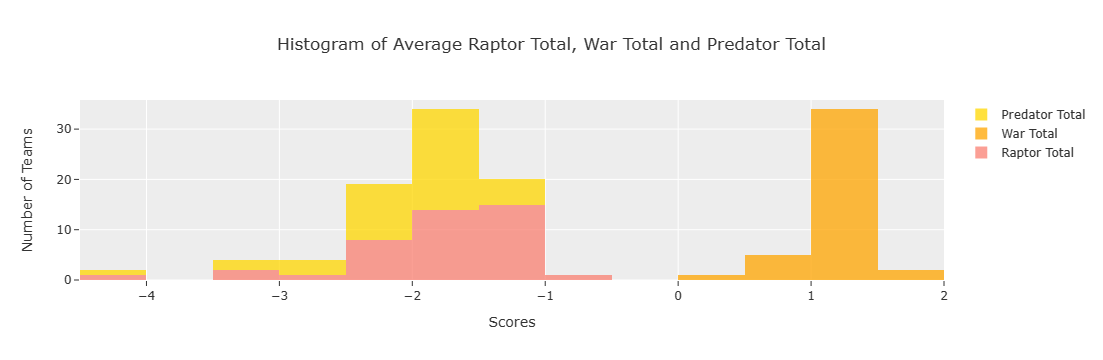

In [15]:
x0=agg_sum["raptor_total"]
x1=agg_sum["war_total"]
x3=agg_sum["predator_total"]
y=agg_sum["team"]
fig = go.Figure()
fig.add_trace(go.Histogram(x=x0,y=y,name='Raptor Total',marker_color='salmon'))
fig.add_trace(go.Histogram(x=x1,y=y,name='War Total',marker_color='orange'))
fig.add_trace(go.Histogram(x=x3,y=y,name='Predator Total',marker_color='gold'))

# Overlay both histograms
fig.update_layout(barmode='stack',title_text='Histogram of Average Raptor Total, War Total and Predator Total',
                  xaxis_title_text='Scores',
                  yaxis_title_text='Number of Teams',
                 template="ggplot2"
 
                 )
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

In [16]:
#defining mean dataframe by player
# ref-tutor
mean_df = clean_df.groupby("player_name").mean(numeric_only = True).reset_index()
mean_df.head()

player_name       season         poss           mp  raptor_offense  \
0     A.C. Green  1993.166667  2714.833333  1355.700000       -0.358516   
1  A.J. Bramlett  2000.000000   123.000000    61.000000       -8.360250   
2   A.J. English  1991.500000  3196.500000  1554.000000       -1.835582   
3    A.J. Guyton  2002.000000   787.333333   415.333333       -4.140556   
4    A.J. Lawson  2023.000000   119.500000    54.000000       -5.160708   

   raptor_defense  raptor_total  war_total  war_reg_season  war_playoffs  \
0        0.181476     -0.177040   2.005301        1.790797      0.214503   
1       -1.460235     -9.820485  -0.221281       -0.221281      0.000000   
2       -2.554083     -4.389665  -1.298910       -1.298910      0.000000   
3       -1.434026     -5.574582  -0.077551       -0.077551      0.000000   
4       -9.392145    -14.552853  -0.111057       -0.111057      0.000000   

   predator_offense  predator_defense  predator_total  pace_impact  \
0         -0.444949         -0.005895       -0.450844    -0.487704   
1         -7.899853         -1.093612       -8.993465     0.527413   
2         -2.246574         -2.712289       -4.958862     0.001642   
3         -3.658171         -2.666460       -6.324631    -0.080961   
4         -4.387150         -8.968243      -13.355393     2.066382   

   raptor_box_offense  raptor_box_defense  raptor_box_total  \
0            0.000000            0.000000          0.000000   
1            0.000000            0.000000          0.000000   
2            0.000000            0.000000          0.000000   
3            0.000000            0.000000          0.000000   
4            0.007521           -9.038925         -9.031403   

   raptor_onoff_offense  raptor_onoff_defense  raptor_onoff_total  
0              0.000000              0.000000            0.000000  
1              0.000000              0.000000            0.000000  
2              0.000000              0.000000            0.000000  
3              0.000000              0.000000            0.000000  
4            -24.623719             -8.015667          -32.639386

### Question 1: Do the average amount of possessions per player (across all seasons) greatly impact that player’s total RAPTOR ratings? Why or why not?

In [17]:
# defining a full list of players from both sets of data based on TOTAL possessions and TOTAL raptor totals

poss_raptor_sum = clean_df.groupby(["player_name"])[["poss", "raptor_total"]].sum(numeric_only = None).reset_index()
poss_raptor_sum.head()

player_name   poss  raptor_total
0     A.C. Green  81445     -5.311204
1  A.J. Bramlett    123     -9.820485
2   A.J. English   6393     -8.779331
3    A.J. Guyton   2362    -16.723745
4    A.J. Lawson    239    -29.105705

In [42]:
# defining a full list of players from both sets of data based on AVERAGE possessions and AVERAGE raptor totals

poss_raptor_avg = mean_df.sort_values(by="poss", ascending= False)
poss_raptor_avg.reset_index()
poss_raptor_avg.head(3)

player_name  season    poss      mp  raptor_offense  \
1192      Franz Wagner  2022.5  5282.0  2519.0        0.646062   
1453  Jabari Smith Jr.  2023.0  5124.0  2451.0       -3.261084   
2707    Paolo Banchero  2023.0  5096.0  2430.0       -1.397951   

      raptor_defense  raptor_total  war_total  war_reg_season  war_playoffs  \
1192        1.343920      1.989981   6.135308        6.135308           0.0   
1453       -1.462099     -4.723183  -2.460988       -2.460988           0.0   
2707       -1.690713     -3.088664  -0.421516       -0.421516           0.0   

      predator_offense  predator_defense  predator_total  pace_impact  \
1192         -0.487098          1.126964        0.639866     0.155131   
1453         -2.764936         -1.793383       -4.558320    -0.265003   
2707         -1.596660         -1.852706       -3.449365     0.395364   

      raptor_box_offense  raptor_box_defense  raptor_box_total  \
1192            0.341273            0.359909          0.701182   
1453           -3.143492           -0.846204         -3.989696   
2707           -1.577063           -0.880123         -2.457186   

      raptor_onoff_offense  raptor_onoff_defense  raptor_onoff_total  
1192              0.453715              2.937217            3.390932  
1453             -2.987966             -3.860819           -6.848785  
2707             -0.515354             -4.506574           -5.021928

In [40]:
# Sorting top 20 players based on total possessions and raptor totals

poss_sum = poss_raptor_sum.sort_values(by="poss", ascending=False)
poss_sum_top = poss_sum.head(20)

raptor = poss_raptor_sum.sort_values(by="raptor_total", ascending=False)
raptor_sum_top = raptor.head(20)

In [39]:
# Sorting top 20 players based on AVG possessions and raptor totals

poss_avg_top = poss_raptor_avg.head(20)

raptor = poss_raptor_avg.sort_values(by="raptor_total", ascending=False)
raptor_avg_top = raptor.head(20)

**Top 20 Players by Possessions (Total and Average)**

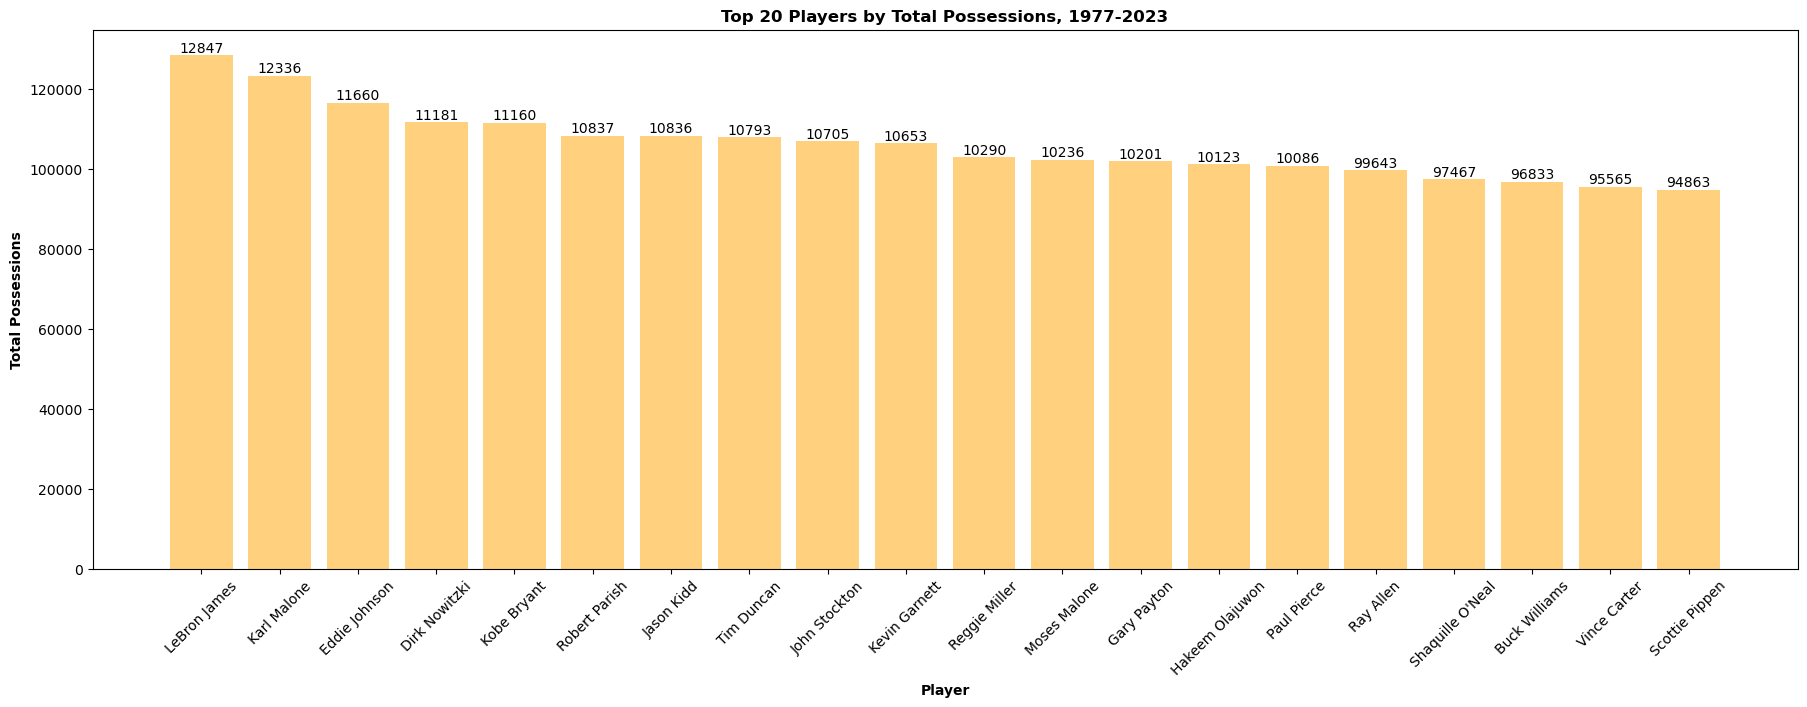

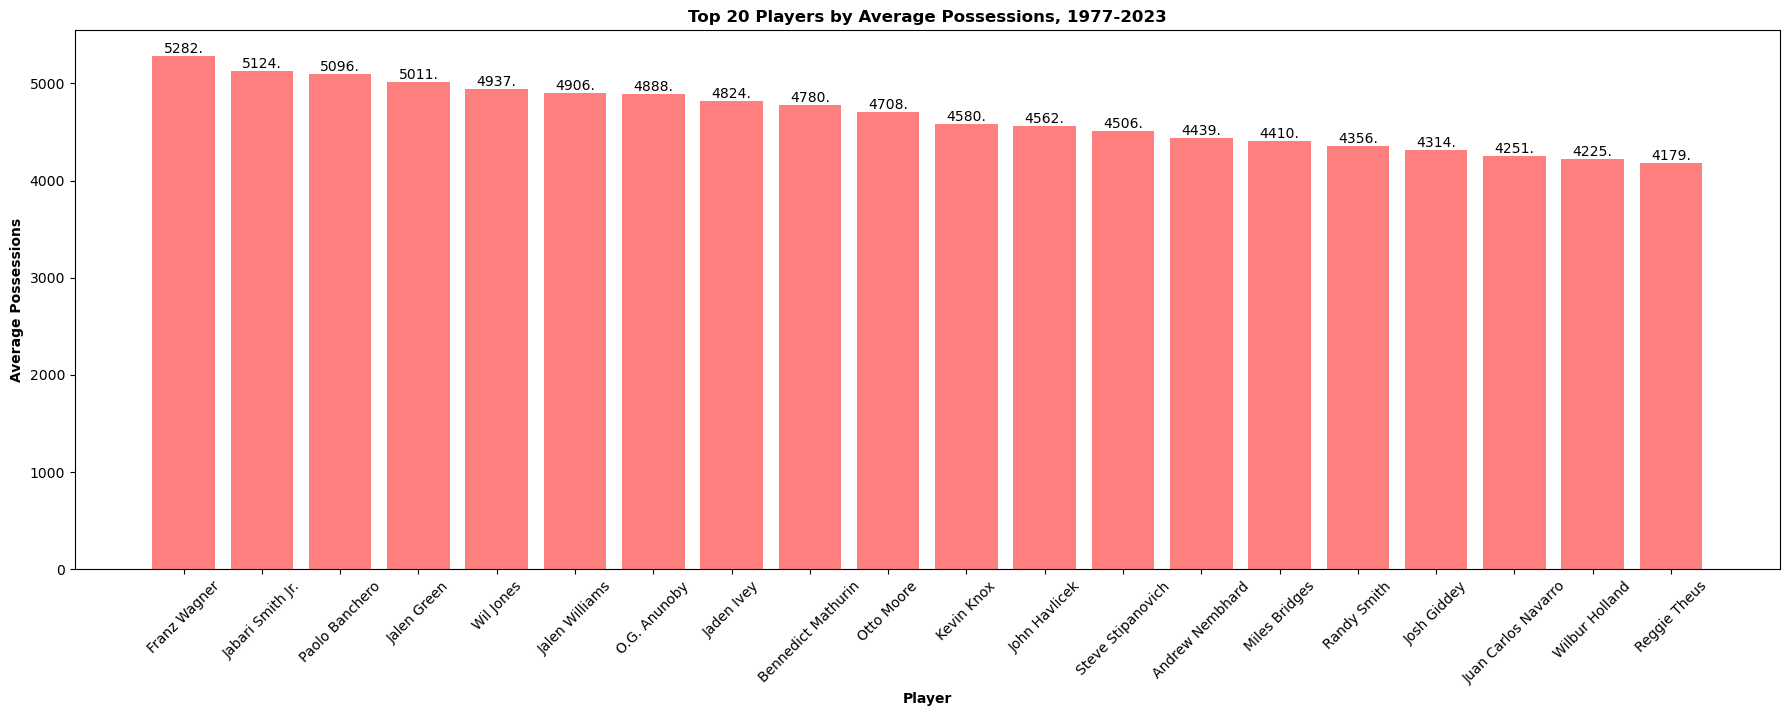

In [21]:
# Slice/sort first graph

top_20_poss_sum = poss_sum_top.sort_values(by="poss", ascending=False).head(20)

# Set up variables
poss = top_20_poss_sum["poss"]
player_names = top_20_poss_sum["player_name"]
color = "orange"

# Generate total bar plot
bar_plot(player_names, poss, "Player", "Total Possessions", "Players by Total Possessions, 1977-2023", (22,7), color)

print("")
print("")

# Slice/sort second graph

top_20_poss_avg = poss_avg_top.sort_values(by="poss", ascending=False).head(20)

# Set up variables
poss = top_20_poss_avg["poss"]
player_names = top_20_poss_avg["player_name"]
color = "red"

# Generate average bor plot
bar_plot(player_names, poss, "Player", "Average Possessions", "Players by Average Possessions, 1977-2023", (22,7), color)

**Top 20 Players by RAPTOR Total (Total and Average)**

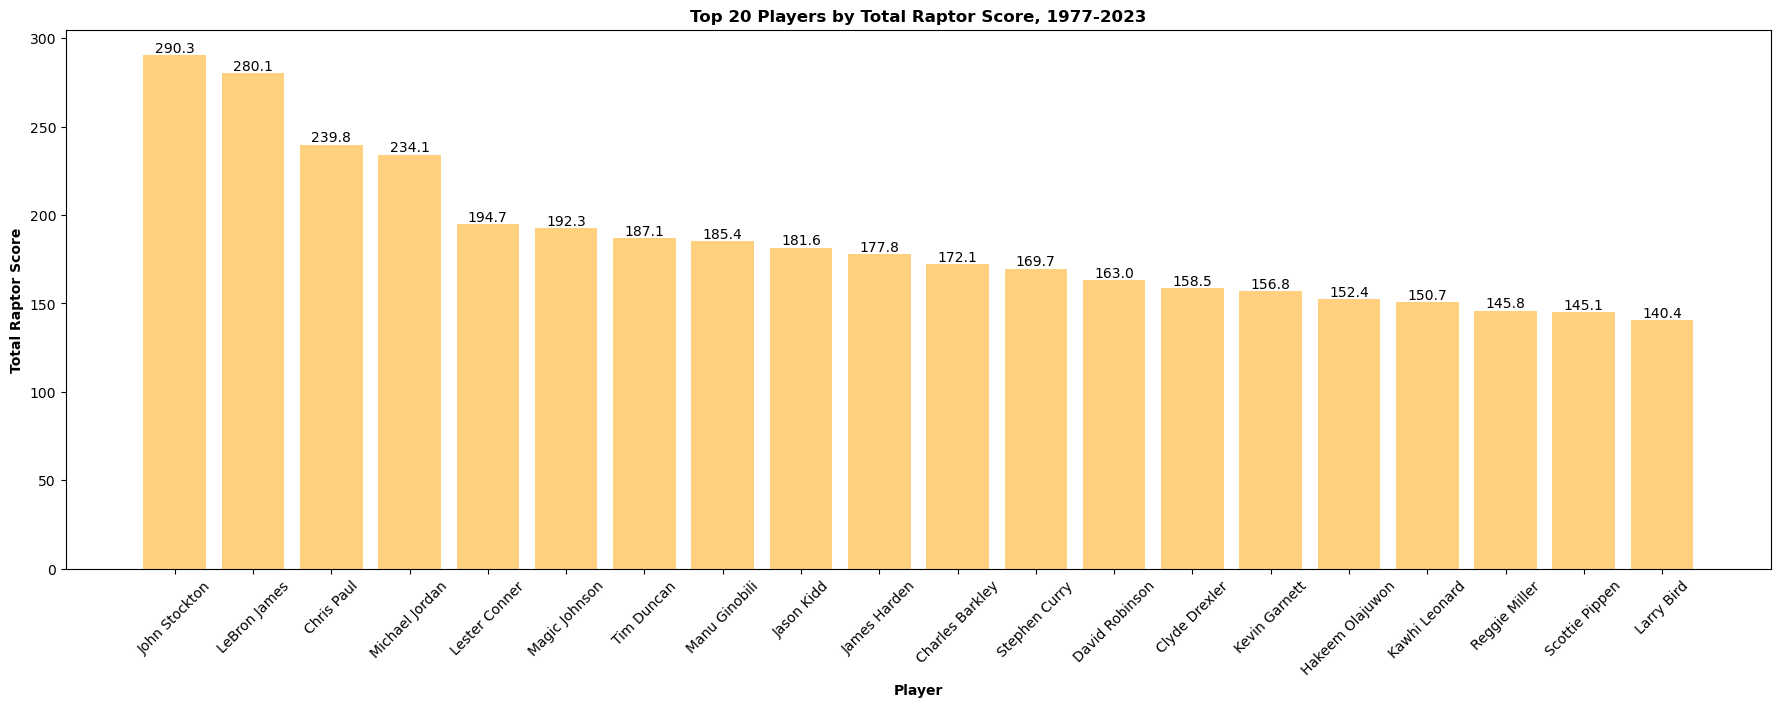

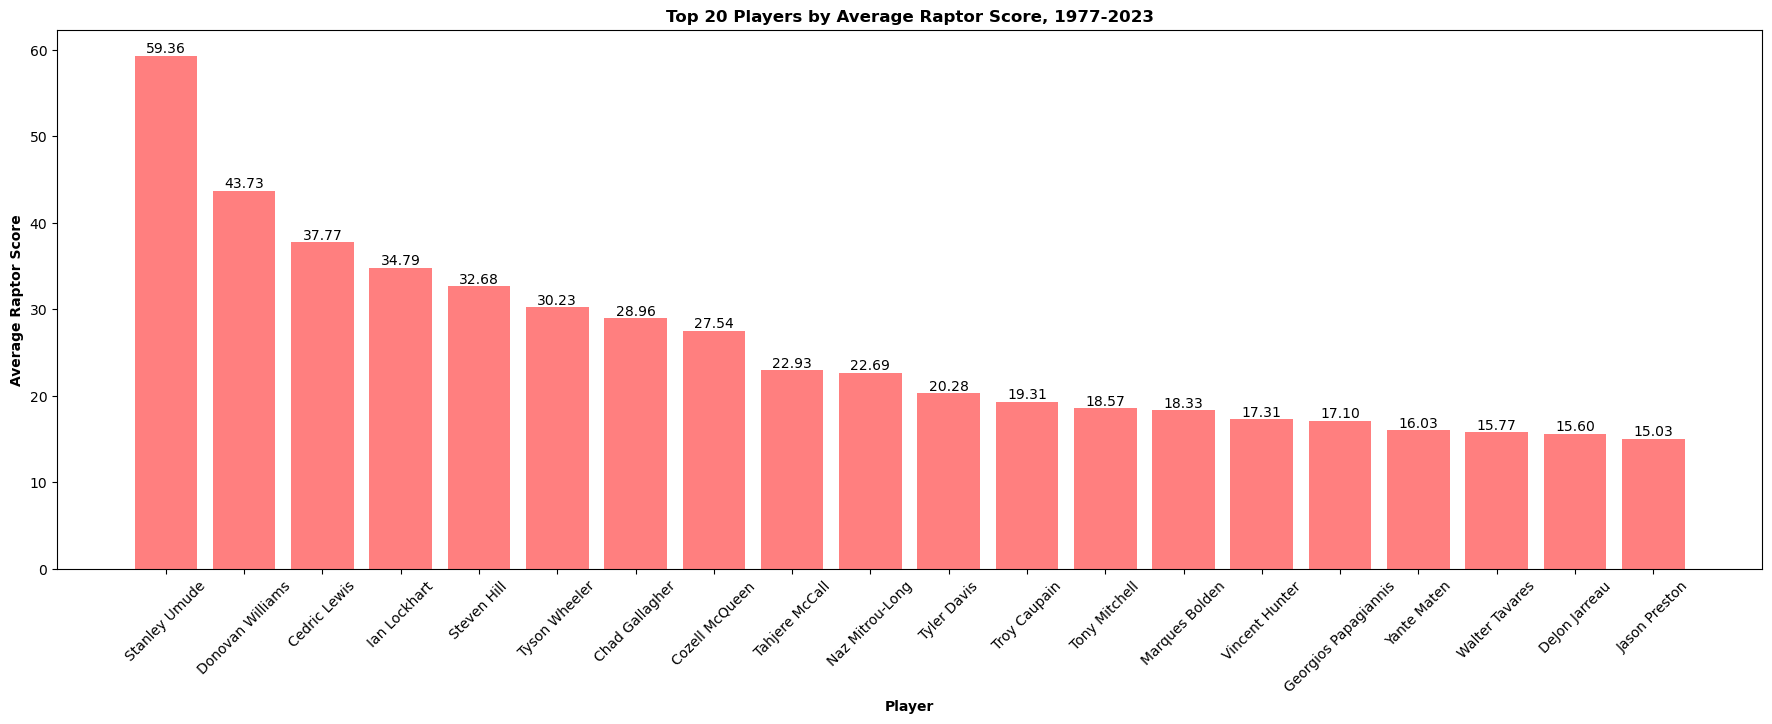

In [22]:
# Slice/sort first graph

top_20_raptor_sum = raptor_sum_top.sort_values(by="raptor_total", ascending=False).head(20)

# Set up variables
poss = top_20_raptor_sum["raptor_total"]
player_names = top_20_raptor_sum["player_name"]
color = "orange"

# Generate total bar plot
bar_plot(player_names, poss, "Player", "Total Raptor Score", "Players by Total Raptor Score, 1977-2023", (22,7), color)

print("")
print("")

# Slice/sort second graph

top_20_raptor_avg = raptor_avg_top.sort_values(by="raptor_total", ascending=False).head(20)

# Set up variables
poss = top_20_raptor_avg["raptor_total"]
player_names = top_20_raptor_avg["player_name"]
color = "red"

# Generate average bar blot
bar_plot(player_names, poss, "Player", "Average Raptor Score", "Players by Average Raptor Score, 1977-2023", (22,7), color)

**Linear Regression for Total Raptor Score vs. Total Possessions**

In [23]:
# make a new dataframe to display by teams

total_players = clean_df.groupby("team")["player_name"].count()
raptor_total = clean_df.groupby("team")["raptor_total"].mean()
poss_total = clean_df.groupby("team")["poss"].mean()

team_poss_raptor = pd.DataFrame({"Total Players":total_players,
                                 "Total RAPTOR Score":raptor_total,
                                 "Total Possessions":poss_total})

team_poss_raptor_lin = team_poss_raptor.reset_index()
team_poss_raptor_lin.head()

team  Total Players  Total RAPTOR Score  Total Possessions
0  ATL           1185           -1.570031        1642.004219
1  BOS           1222           -1.199087        1704.759411
2  BRK            340           -1.191441        1366.402941
3  BUF             37           -2.715885        2382.189189
4  CHA            380           -2.366248        1938.507895

The r-value is: 0.19019525425278175


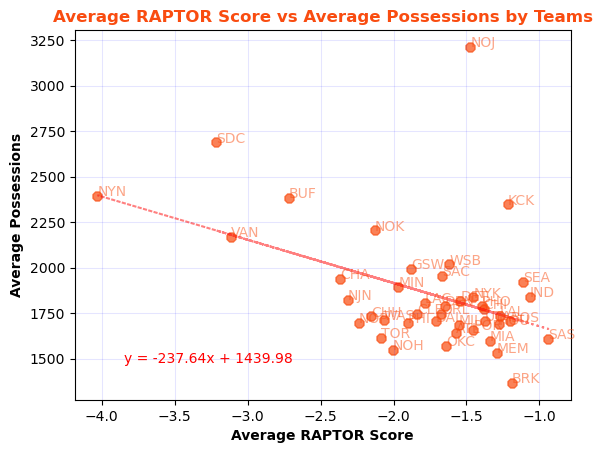

In [24]:
# linear regression for total RAPTOR score vs. total possessions

x_axis = team_poss_raptor_lin["Total RAPTOR Score"]
y_axis = team_poss_raptor_lin["Total Possessions"]
team_names = team_poss_raptor_lin["team"]

regression_plot(x_axis, y_axis, "Average RAPTOR Score", "Average Possessions", (-4,0.4), 0.1, 0.1)


## Question #2: Which team displayed the highest/lowest RAPTOR ratings across the 2022-23 season across all players? How does this data compare to their predictive PREDATOR model?

In [43]:
# Total Scores by Teams

raptor_team = latest_df.groupby("team")["raptor_total"].mean()
predator_team = latest_df.groupby("team")["predator_total"].mean()
raptor_offense_team = latest_df.groupby("team")["raptor_offense"].mean()
raptor_defense_team = latest_df.groupby("team")["raptor_defense"].mean()
predator_offense_team = latest_df.groupby("team")["predator_offense"].mean() 
predator_defense_team = latest_df.groupby("team")["predator_defense"].mean()

In [44]:
# Combine into dataframe

raptor_predator = pd.DataFrame({"Raptor Total":raptor_team,
                                   "Predator Total":predator_team,
                                   "Raptor Offense":raptor_offense_team,
                                   "Raptor Defense":raptor_defense_team,
                                   "Predator Offense":predator_offense_team,
                                   "Predator Defense":predator_defense_team})

raptor_predator_df = raptor_predator.reset_index()
raptor_predator_df.head()

team  Raptor Total  Predator Total  Raptor Offense  Raptor Defense  \
0  ATL      0.228776        0.061351        0.407567       -0.178791   
1  BOS     -0.113476       -1.028582        0.744770       -0.858247   
2  BRK     -2.673244       -2.758294       -3.414418        0.741173   
3  CHA     -2.121315       -2.552996       -1.917041       -0.204274   
4  CHI     -0.222302       -1.296009       -0.773662        0.551360   

   Predator Offense  Predator Defense  
0          1.082030         -1.020679  
1          0.263637         -1.292219  
2         -3.253440          0.495146  
3         -2.036420         -0.516577  
4         -1.321329          0.025320

In [45]:
#raptor_team.sort_values(ascending=False, inplace=True)
#top_20_rteams=raptor_team.head(20)
#top_20_rteams

raptor_predator_df.sort_values(by="Raptor Total", ascending=False, inplace=True)
top_10_rteams=raptor_predator_df.head(10)
top_10_rteams.head()

team  Raptor Total  Predator Total  Raptor Offense  Raptor Defense  \
5   CLE      0.696323        0.233974       -1.905802        2.602125   
25  SAC      0.416602       -0.898472       -0.050059        0.466661   
8   DET      0.368597        0.087427       -0.859854        1.228451   
0   ATL      0.228776        0.061351        0.407567       -0.178791   
27  TOR     -0.013382       -0.021695       -0.423977        0.410595   

    Predator Offense  Predator Defense  
5          -1.826873          2.060847  
25         -0.540490         -0.357981  
8          -0.607580          0.695007  
0           1.082030         -1.020679  
27         -0.433731          0.412036

In [46]:
#predator_team.sort_values(ascending=False, inplace=True)
#top_20_pteams=predator_team.head(20)
#top_20_pteams

raptor_predator_df.sort_values(by="Predator Total", ascending=False, inplace=True)
top_10_pteams=raptor_predator_df.head(10)
top_10_pteams.head()

team  Raptor Total  Predator Total  Raptor Offense  Raptor Defense  \
5   CLE      0.696323        0.233974       -1.905802        2.602125   
8   DET      0.368597        0.087427       -0.859854        1.228451   
0   ATL      0.228776        0.061351        0.407567       -0.178791   
27  TOR     -0.013382       -0.021695       -0.423977        0.410595   
20  OKC     -0.307882       -0.658779       -0.611157        0.303275   

    Predator Offense  Predator Defense  
5          -1.826873          2.060847  
8          -0.607580          0.695007  
0           1.082030         -1.020679  
27         -0.433731          0.412036  
20         -0.703065          0.044286

In [47]:
raptor_predator_df.sort_values(by="Raptor Total", ascending=True, inplace=True)
bottom_10_rteams=raptor_predator_df.head(10)
bottom_10_rteams.head()

team  Raptor Total  Predator Total  Raptor Offense  Raptor Defense  \
17  MIN     -4.322250       -3.864355       -3.233863       -1.088388   
24  POR     -3.993643       -3.893670       -2.056589       -1.937054   
12  LAC     -3.515506       -4.926555       -2.902093       -0.613413   
7   DEN     -3.198079       -4.143173       -3.169787       -0.028292   
22  PHI     -2.877075       -2.354812       -1.740907       -1.136168   

    Predator Offense  Predator Defense  
17         -3.123282         -0.741073  
24         -2.136366         -1.757305  
12         -3.162825         -1.763731  
7          -1.991834         -2.151339  
22         -1.002253         -1.352559

In [48]:
raptor_predator_df.sort_values(by="Predator Total", ascending=True, inplace=True)
bottom_10_pteams=raptor_predator_df.head(10)
bottom_10_pteams.head()

team  Raptor Total  Predator Total  Raptor Offense  Raptor Defense  \
12  LAC     -3.515506       -4.926555       -2.902093       -0.613413   
7   DEN     -3.198079       -4.143173       -3.169787       -0.028292   
24  POR     -3.993643       -3.893670       -2.056589       -1.937054   
17  MIN     -4.322250       -3.864355       -3.233863       -1.088388   
16  MIL     -2.493127       -3.609198       -0.596870       -1.896257   

    Predator Offense  Predator Defense  
12         -3.162825         -1.763731  
7          -1.991834         -2.151339  
24         -2.136366         -1.757305  
17         -3.123282         -0.741073  
16         -0.339562         -3.269636

In [49]:
#CLE Values
CLE_r_values = [-1.906, 2.602, -1.827, 2.061]
CLE_theta_values = ["Raptor Offense","Raptor Defense","Predator Offense","Predator Defense"]

In [50]:
def polar_scatter(rvalue, theta, title):
    fig=px.scatter_polar(raptor_predator_df, r=rvalue, theta=theta, title=title)
    fig.show()

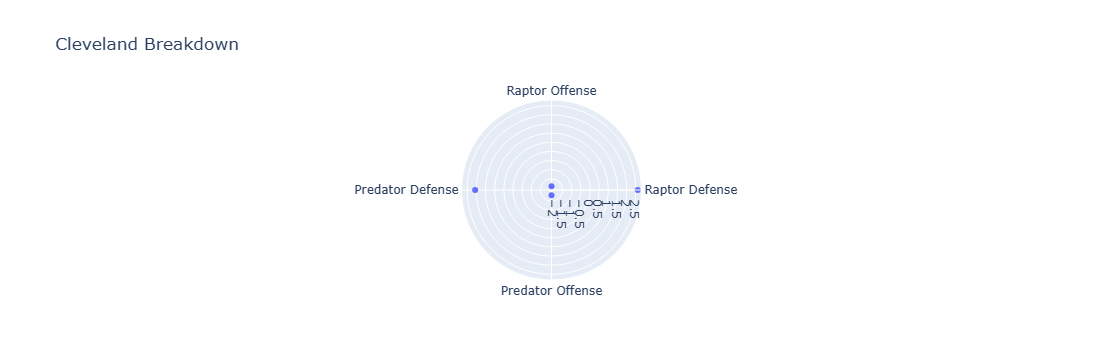

In [51]:
polar_scatter(CLE_r_values, CLE_theta_values, "Cleveland Breakdown")

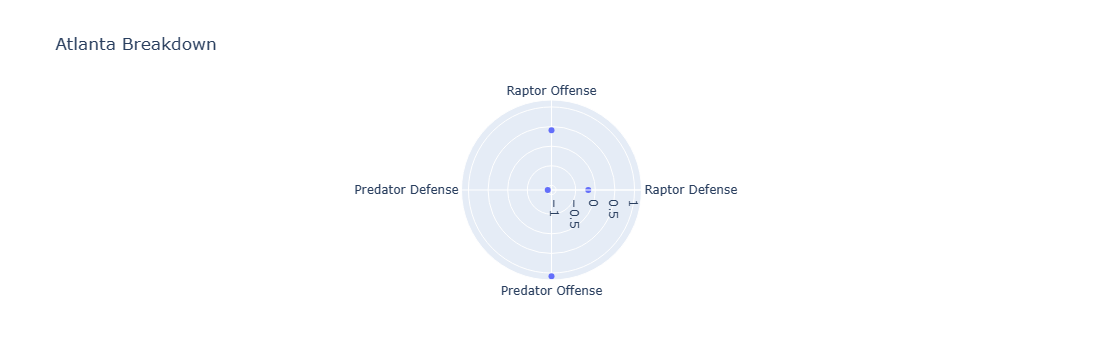

In [52]:
#ATL Values
ATL_r_values = [.408, -.179, 1.082, -1.021]


polar_scatter(ATL_r_values, CLE_theta_values, "Atlanta Breakdown")

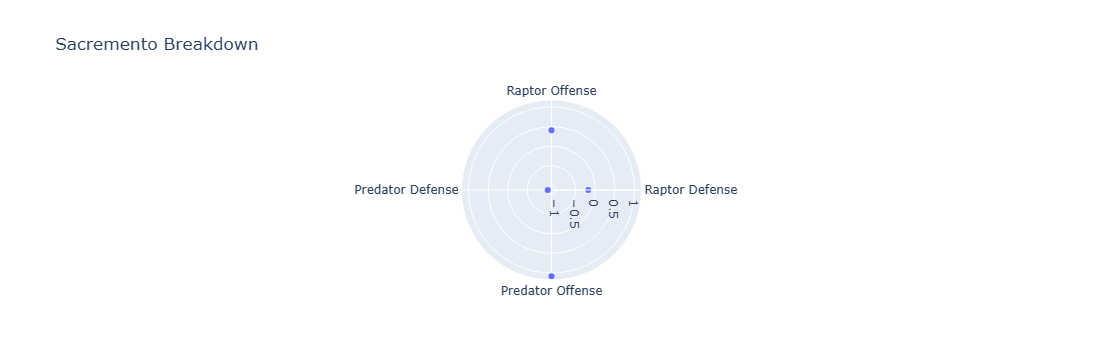

In [53]:
SAC_r_values = [.408, -.179, 1.082, -1.021]


polar_scatter(SAC_r_values, CLE_theta_values, "Sacremento Breakdown")

In [54]:
def polar_scatter(rvalue, title):
    fig=px.scatter_polar(raptor_predator_df, r=rvalue, theta="team", color="team", title=title, template="ggplot2")
    fig.show()

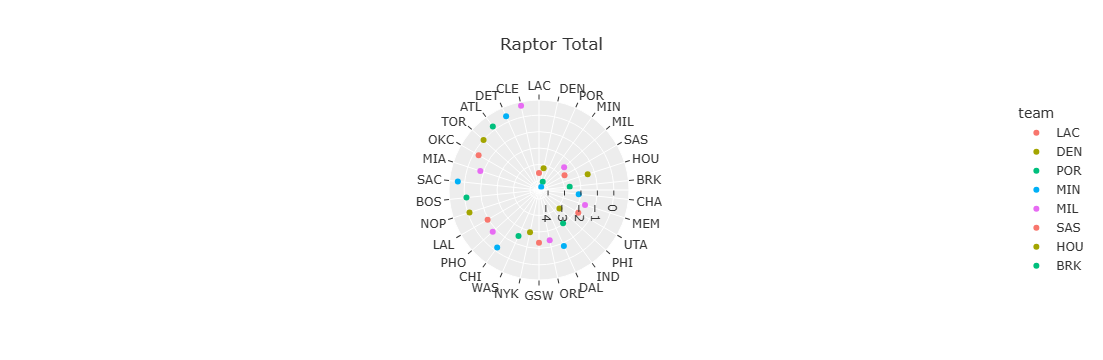

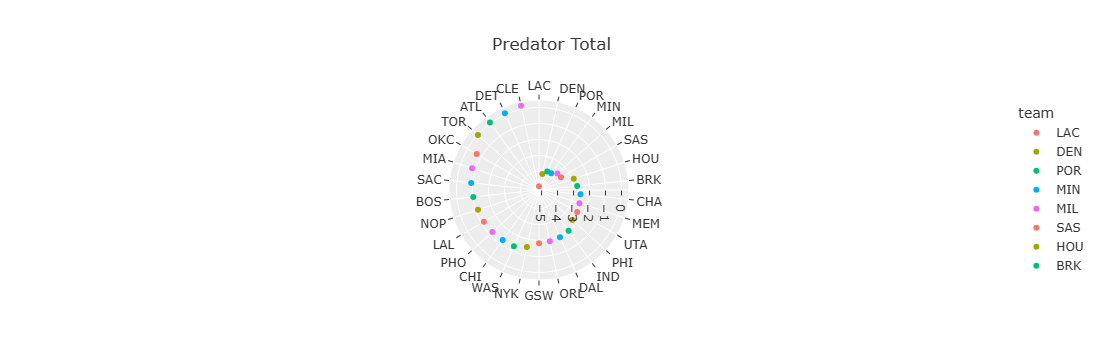

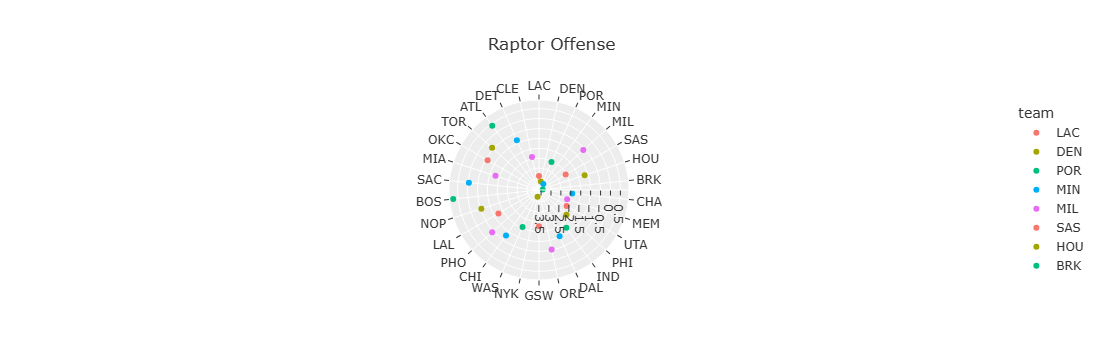

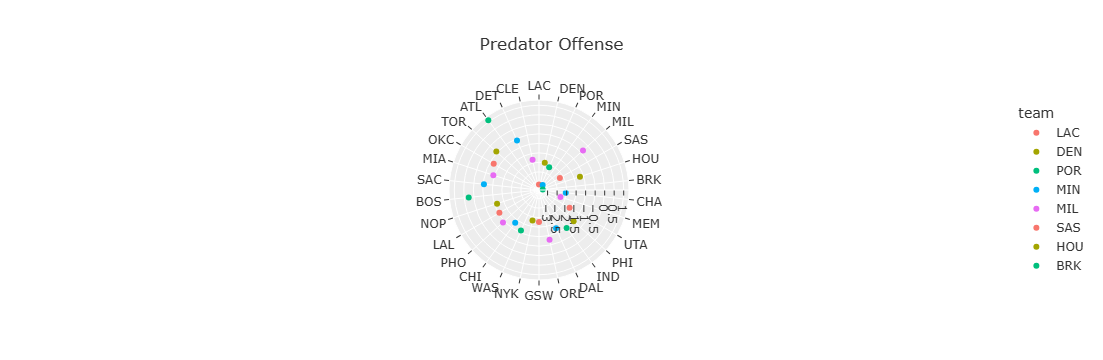

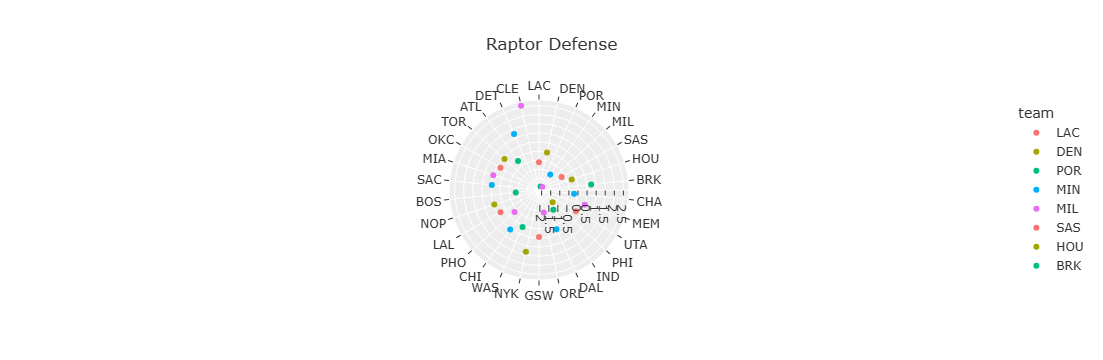

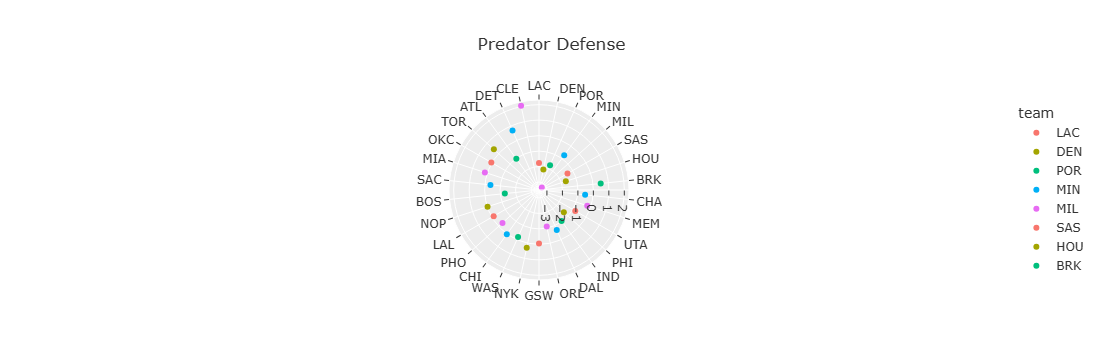

In [55]:
polar_scatter("Raptor Total", "Raptor Total")
polar_scatter("Predator Total", "Predator Total")
polar_scatter("Raptor Offense", "Raptor Offense")
polar_scatter("Predator Offense", "Predator Offense")
polar_scatter("Raptor Defense", "Raptor Defense")
polar_scatter("Predator Defense", "Predator Defense")

TypeError: bar_plot() missing 1 required positional argument: 'color'

<Figure size 2000x600 with 0 Axes>

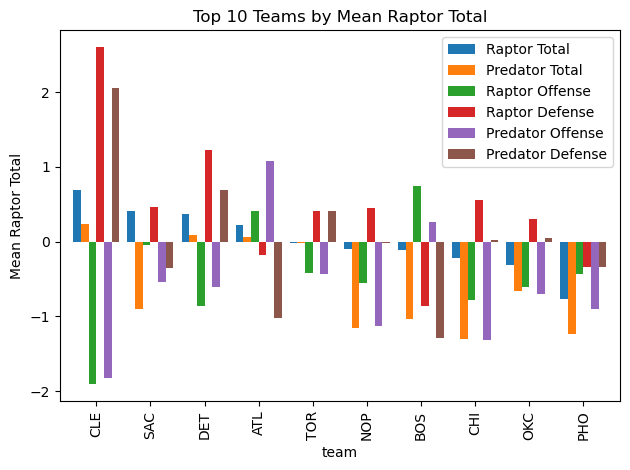

In [56]:
plt.figure(figsize=(20, 6))
top_10_rteams.plot(x="team",kind= "bar",width=.85, )
plt.title("Top 10 Teams by Mean Raptor Total")
plt.xlabel("team")
plt.ylabel("Mean Raptor Total")
plt.xticks(rotation= 90)
plt.tight_layout()

top_raptor_teams = raptor_predator_df[["team", "Raptor Total"]].\
sort_values(by="Raptor Total", ascending=False).head(10)

# Set up variables
raptor = top_raptor_teams["Raptor Total"]
team_names = top_raptor_teams["team"]

# Generate Bar plot
bar_plot(team_names, raptor, "Team", "Mean RAPTOR Total", "Teams by Mean RAPTOR Total", (22,7))

#plt.figure(figsize=(10, 6))
#top_20_pteams.plot(kind= "bar")
#plt.title("Top 20 Teams by Mean Predator Total")
#plt.xlabel("Team")
#plt.ylabel("Mean Raptor Total")
#plt.xticks(rotation= 90)
#plt.tight_layout()

top_predator_teams = raptor_predator_df[["team", "Predator Total"]].\
sort_values(by="Predator Total", ascending=False).head(10)

# Set up variables
predator = top_predator_teams["Predator Total"]
team_names = top_predator_teams["team"]

# Generate Bar plot
bar_plot(team_names, raptor, "Team", "Mean PREDATOR Total", "Teams by Mean PREDATOR Total", (22,7))

In [ ]:
plt.figure(figsize=(20, 6))
bottom_10_rteams.plot(x="team",kind= "bar",width=.85, )
plt.title("Bottom 10 Teams by Mean Raptor Total")
plt.xlabel("team")
plt.ylabel("Mean Raptor Total")
plt.xticks(rotation= 90)
plt.tight_layout()

bottom_raptor_teams = raptor_predator_df[["team", "Raptor Total"]].\
sort_values(by="Raptor Total", ascending=False).tail(10)

# Set up variables
raptor = bottom_raptor_teams["Raptor Total"]
team_names = bottom_raptor_teams["team"]

# Generate Bar plot
bar_plot(team_names, raptor, "Team", "Mean RAPTOR Total", "Bottom Teams by Mean RAPTOR Total", (22,7))

#plt.figure(figsize=(10, 6))
#bottom_20_pteams.plot(kind= "bar")
#plt.title("Bottom 20 Teams by Mean Raptor Total")
#plt.xlabel("Team")
#plt.ylabel("Mean Raptor Total")
#plt.xticks(rotation=45)
#plt.tight_layout()

bottom_predator_teams = raptor_predator_df[["team", "Predator Total"]].\
sort_values(by="Predator Total", ascending=False).tail(10)

# Set up variables
predator = bottom_predator_teams["Predator Total"]
team_names = bottom_predator_teams["team"]

# Generate Bar plot
bar_plot(team_names, raptor, "Team", "Mean PREDATOR Total", "Bottom Teams by Mean PREDATOR Total", (22,7))

### Question #3: How accurate are the overall results of predictive-RAPTOR, which was used for the historical data charts (1977-2013), compared to those of modern RAPTOR’s integration (2013-Present)?

**Calculating historical and latest RAPTOR totals by team**

In [57]:
his_team_raptor_totals = historical_df.groupby("team")["raptor_total"].sum().reset_index()
his_team_raptor_totals.head()

team  raptor_total
0  ATL  -1867.349832
1  BOS  -1461.653071
2  BRK   -300.833420
3  BUF   -100.487762
4  CHA   -858.869307

In [58]:
lat_team_raptor_totals = latest_df.groupby("team")["raptor_total"].sum().reset_index()
lat_team_raptor_totals.head()

team  raptor_total
0  ATL      6.863266
1  BOS     -3.631239
2  BRK   -104.256530
3  CHA    -40.304983
4  CHI     -4.001443

In [59]:
merged_team_raptor_totals = lat_team_raptor_totals.merge(his_team_raptor_totals, on="team", suffixes=("_latest", "_historical"))
merged_team_raptor_totals.head()

team  raptor_total_latest  raptor_total_historical
0  ATL             6.863266             -1867.349832
1  BOS            -3.631239             -1461.653071
2  BRK          -104.256530              -300.833420
3  CHA           -40.304983              -858.869307
4  CHI            -4.001443             -1531.152283

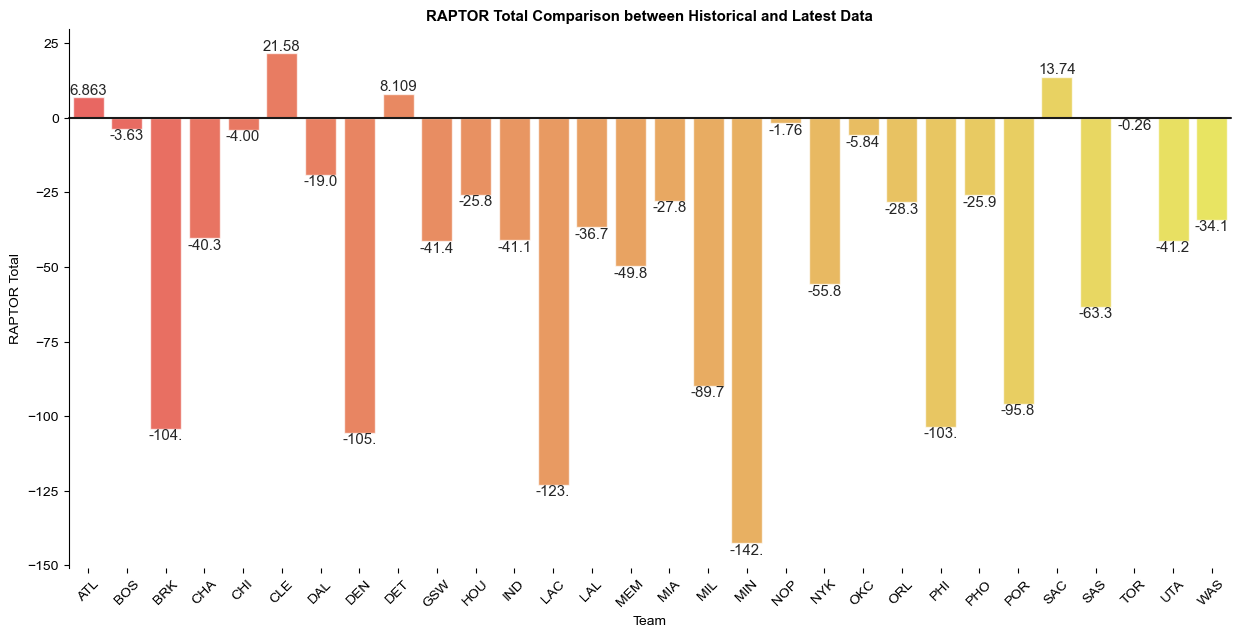

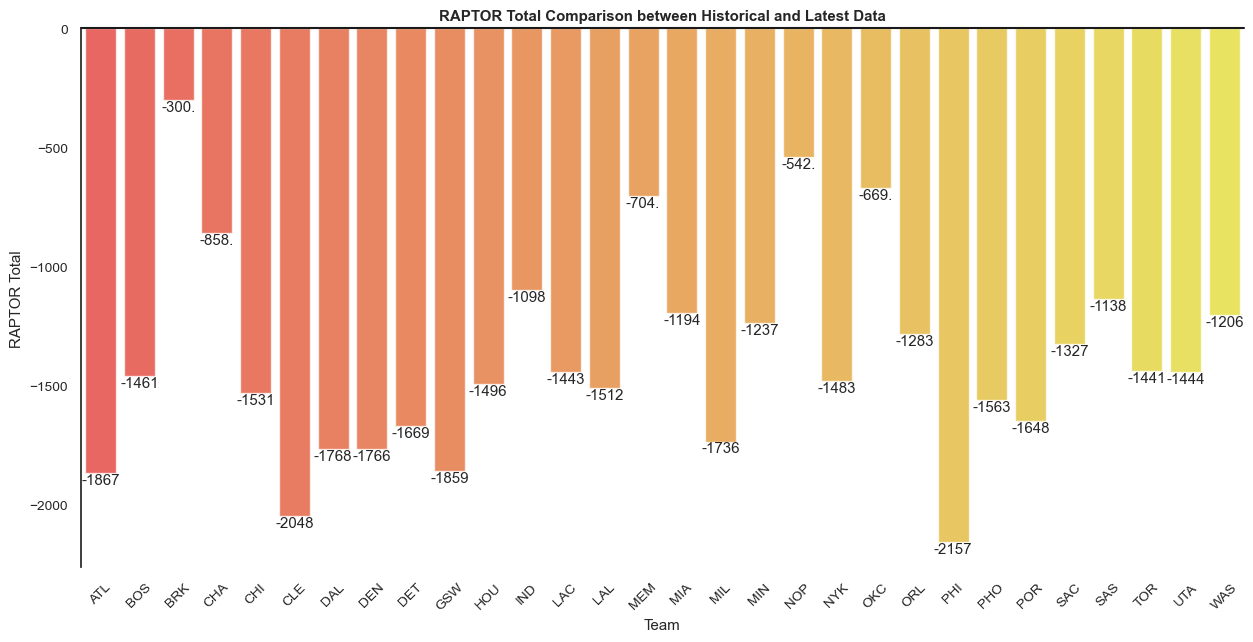

In [60]:
sns_raptor_latest = sns_bar_plot(merged_team_raptor_totals, "team", "raptor_total_latest", "RAPTOR Total Comparison between Historical and Latest Data",
             "Team", "RAPTOR Total")

sns_raptor_his = sns_bar_plot(merged_team_raptor_totals, "team", "raptor_total_historical", "RAPTOR Total Comparison between Historical and Latest Data",
             "Team", "RAPTOR Total")

In [61]:
# trying to figure out jointplot

#sns.jointplot(sns_raptor_latest, sns_raptor_his)

**Calculating Historical and Latest War total**

In [62]:
his_team_war_totals = historical_df.groupby("team")["war_total"].sum().reset_index()
his_team_war_totals.head()

team    war_total
0  ATL  1319.084509
1  BOS  1712.529584
2  BRK   255.392848
3  BUF    36.396243
4  CHA   349.159085

In [63]:
lat_team_war_totals = latest_df.groupby("team")["war_total"].sum().reset_index()
lat_team_war_totals.head()

team  war_total
0  ATL  31.989519
1  BOS  57.010582
2  BRK  31.362127
3  CHA  12.818726
4  CHI  31.283879

In [64]:
merged_war_totals = his_team_war_totals.merge(lat_team_war_totals, on="team", suffixes=("_historical", "_latest"))
merged_war_totals.head()

team  war_total_historical  war_total_latest
0  ATL           1319.084509         31.989519
1  BOS           1712.529584         57.010582
2  BRK            255.392848         31.362127
3  CHA            349.159085         12.818726
4  CHI           1447.384776         31.283879

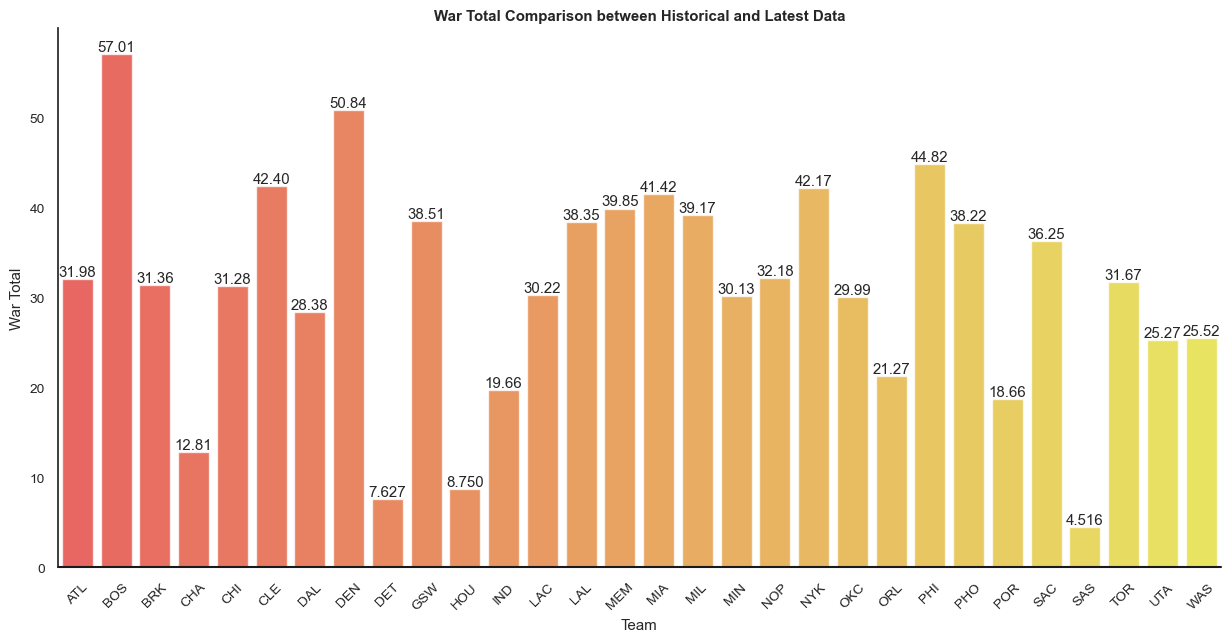

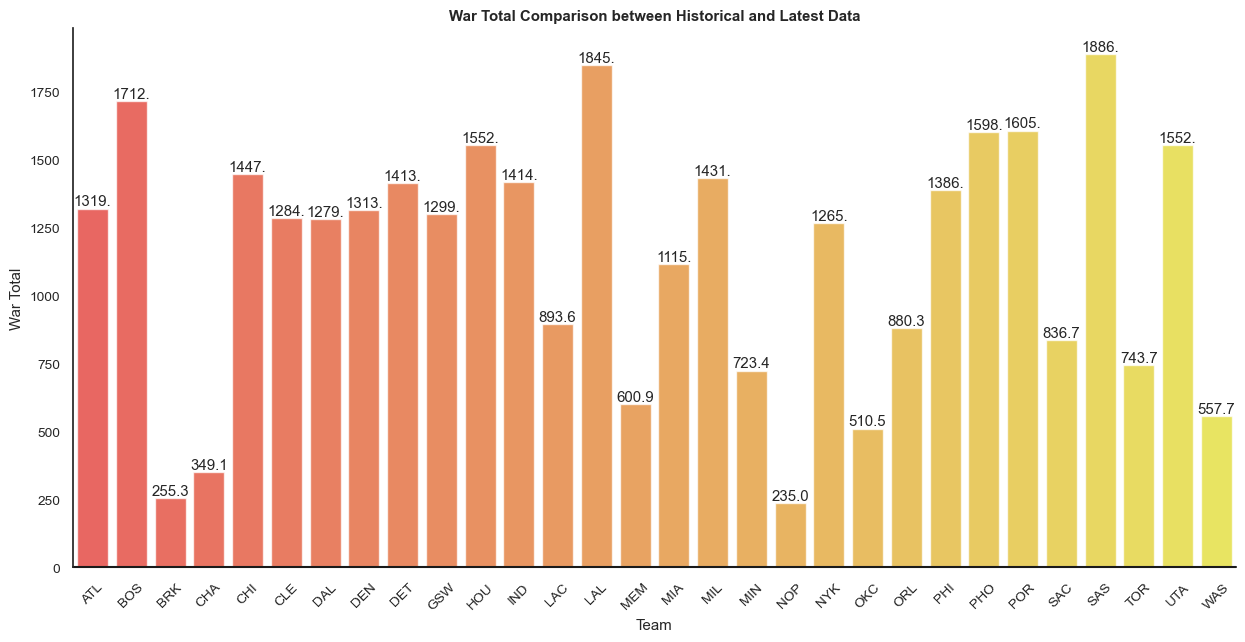

In [65]:
sns_war_latest = sns_bar_plot(merged_war_totals, "team", "war_total_latest", "War Total Comparison between Historical and Latest Data", "Team", "War Total")
sns_war_his = sns_bar_plot(merged_war_totals, "team", "war_total_historical", "War Total Comparison between Historical and Latest Data", "Team", "War Total")


**Calculating Average Historical and Latest RAPTOR total**

In [66]:
average_his_team_raptor_total = historical_df.groupby("team")["raptor_total"].mean().reset_index()
average_his_team_raptor_total.head()

team  raptor_total
0  ATL     -1.616753
1  BOS     -1.228280
2  BRK     -0.999447
3  BUF     -2.715885
4  CHA     -2.379139

In [67]:
average_lat_team_raptor_total = latest_df.groupby("team")["raptor_total"].mean().reset_index()
average_lat_team_raptor_total.head()

team  raptor_total
0  ATL      0.228776
1  BOS     -0.113476
2  BRK     -2.673244
3  CHA     -2.121315
4  CHI     -0.222302

In [68]:
merged_raptor_average_totals = pd.merge(average_lat_team_raptor_total, average_his_team_raptor_total, on="team", suffixes=("_latest", "_historical"))
merged_raptor_average_totals.head()

team  raptor_total_latest  raptor_total_historical
0  ATL             0.228776                -1.616753
1  BOS            -0.113476                -1.228280
2  BRK            -2.673244                -0.999447
3  CHA            -2.121315                -2.379139
4  CHI            -0.222302                -1.402154

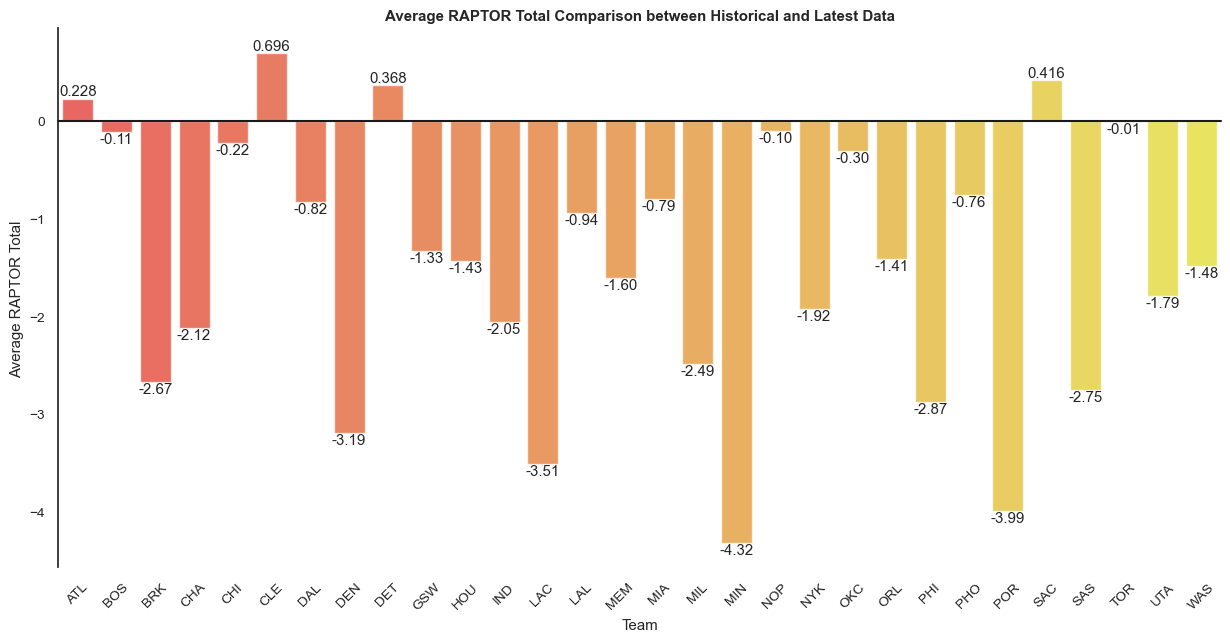

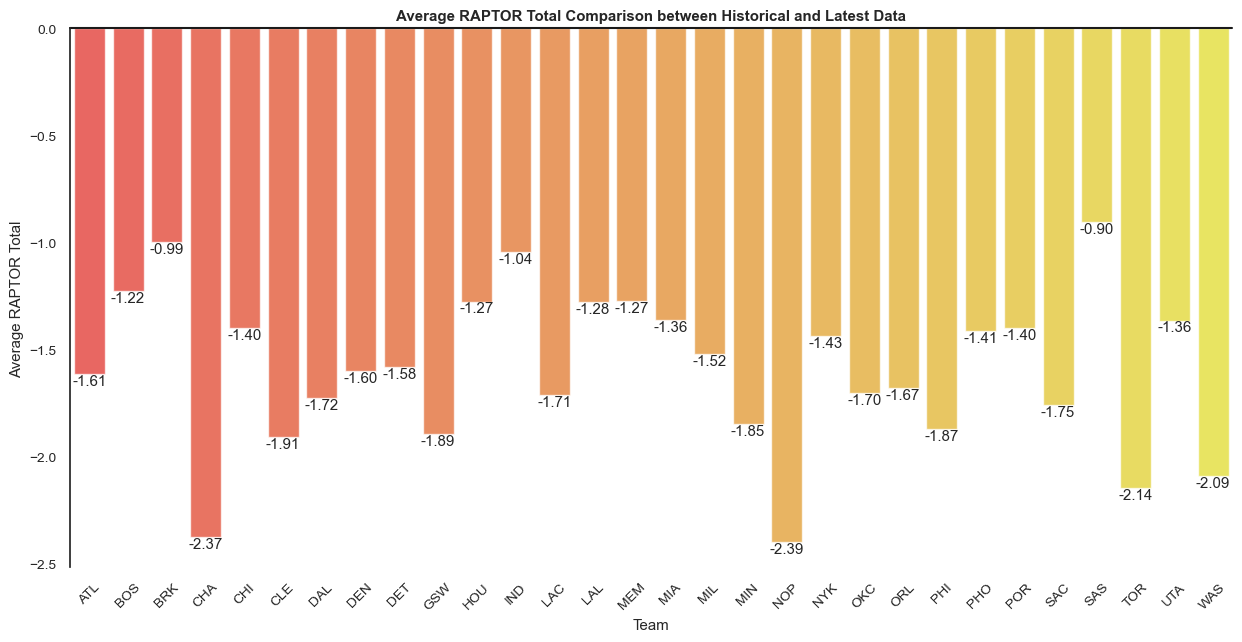

In [69]:
sns_raptor_latest = sns_bar_plot(merged_raptor_average_totals, "team", "raptor_total_latest", "Average RAPTOR Total Comparison between Historical and Latest Data", "Team", "Average RAPTOR Total")
sns_raptor_his = sns_bar_plot(merged_raptor_average_totals, "team", "raptor_total_historical", "Average RAPTOR Total Comparison between Historical and Latest Data", "Team", "Average RAPTOR Total")

**Calculating Average Historical and Latest War total** 

In [70]:
average_his_team_war_totals = historical_df.groupby("team")["war_total"].mean().reset_index()
average_his_team_war_totals.head()

team  war_total
0  ATL   1.142065
1  BOS   1.439100
2  BRK   0.848481
3  BUF   0.983682
4  CHA   0.967200

In [71]:
average_lat_team_war_totals = latest_df.groupby("team")["war_total"].mean().reset_index()
average_lat_team_war_totals.head()

team  war_total
0  ATL   1.066317
1  BOS   1.781581
2  BRK   0.804157
3  CHA   0.674670
4  CHI   1.737993

In [72]:
merged_team_war_totals = pd.merge(average_lat_team_war_totals, average_his_team_war_totals, on="team", suffixes=("_latest", "_historical"))
merged_team_war_totals.head()

team  war_total_latest  war_total_historical
0  ATL          1.066317              1.142065
1  BOS          1.781581              1.439100
2  BRK          0.804157              0.848481
3  CHA          0.674670              0.967200
4  CHI          1.737993              1.325444

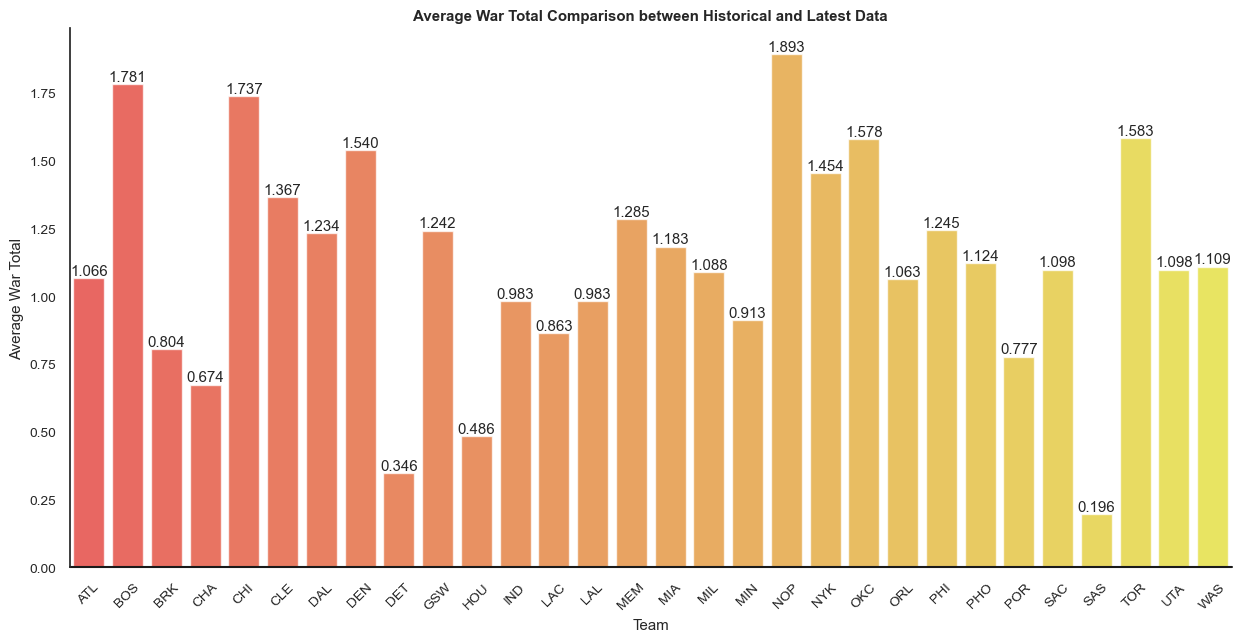

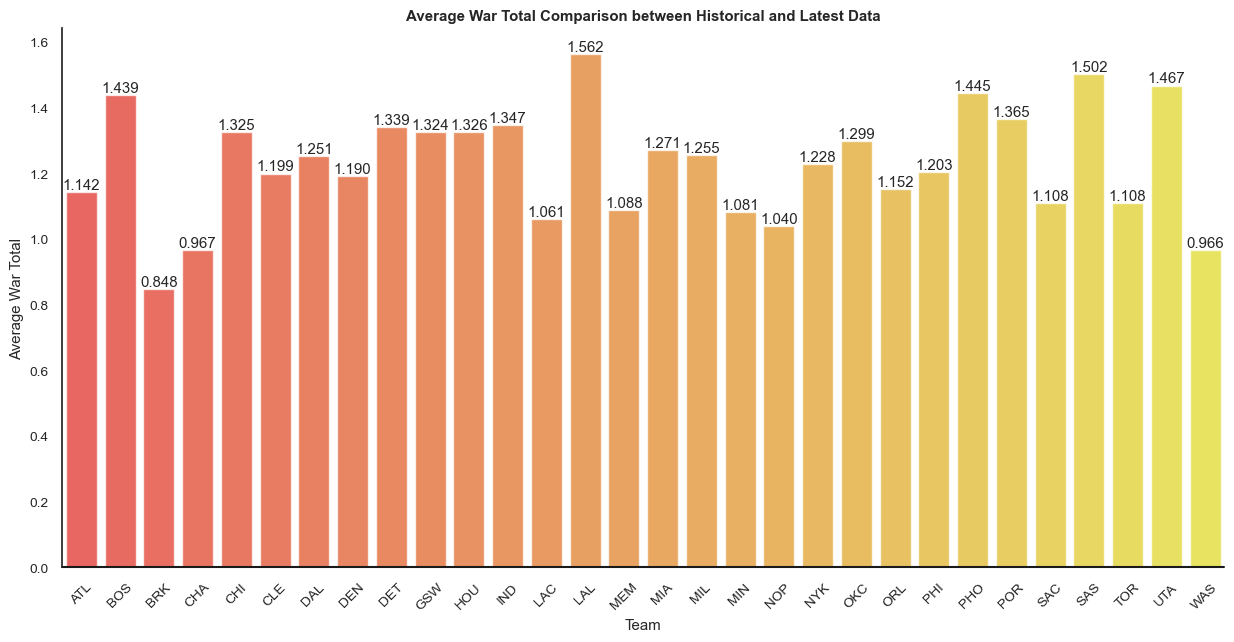

In [73]:
sns_war_latest = sns_bar_plot(merged_team_war_totals, "team", "war_total_latest", "Average War Total Comparison between Historical and Latest Data", "Team", "Average War Total")
sns_war_his = sns_bar_plot(merged_team_war_totals, "team", "war_total_historical", "Average War Total Comparison between Historical and Latest Data", "Team", "Average War Total")

### Question #4: Which players had the most minutes played and the greatest pace impact on their team compared to their total RAPTOR scores?

In [74]:
mean_df.head(2)

player_name       season         poss      mp  raptor_offense  \
0     A.C. Green  1993.166667  2714.833333  1355.7       -0.358516   
1  A.J. Bramlett  2000.000000   123.000000    61.0       -8.360250   

   raptor_defense  raptor_total  war_total  war_reg_season  war_playoffs  \
0        0.181476     -0.177040   2.005301        1.790797      0.214503   
1       -1.460235     -9.820485  -0.221281       -0.221281      0.000000   

   predator_offense  predator_defense  predator_total  pace_impact  \
0         -0.444949         -0.005895       -0.450844    -0.487704   
1         -7.899853         -1.093612       -8.993465     0.527413   

   raptor_box_offense  raptor_box_defense  raptor_box_total  \
0                 0.0                 0.0               0.0   
1                 0.0                 0.0               0.0   

   raptor_onoff_offense  raptor_onoff_defense  raptor_onoff_total  
0                   0.0                   0.0                 0.0  
1                   0.0                   0.0                 0.0

**Top 20 Minutes Played & Pace Impact per Player**

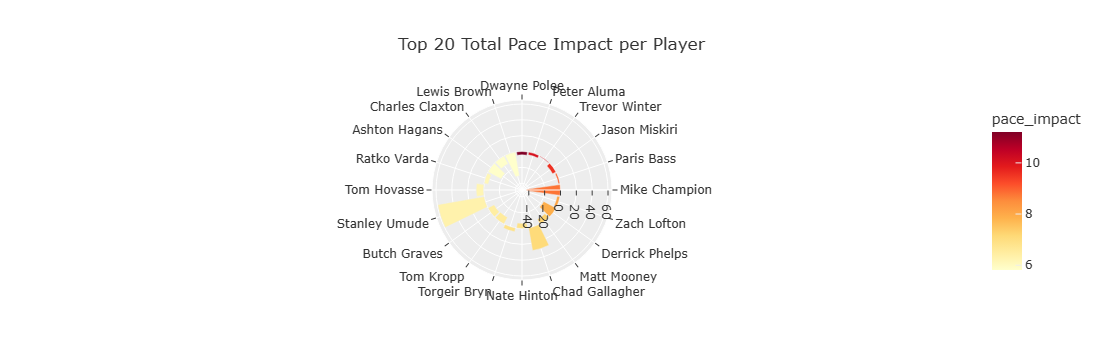

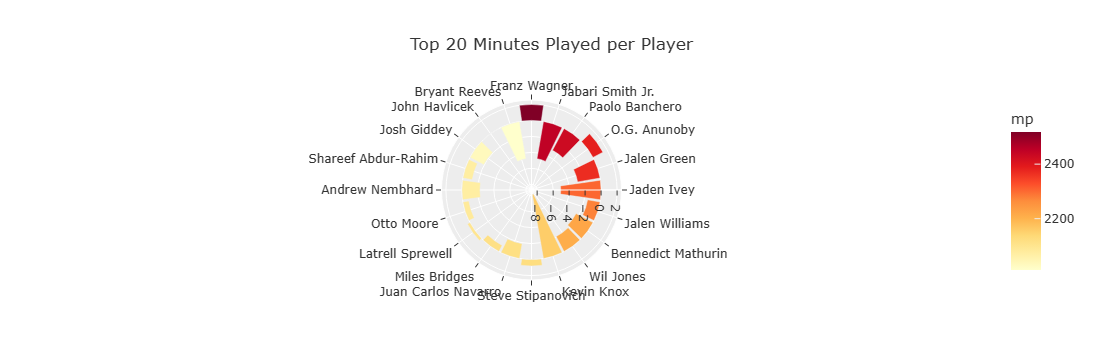

In [75]:
# Sort data

pace=mean_df.sort_values(by="pace_impact",ascending=False)
pace_20=pace.head(20)

tmp=mean_df.sort_values(by="mp",ascending=False)
mp_20=tmp.head(20)

# Generate polar bar

polar_bar(pace_20,"pace_impact","Top 20 Total Pace Impact per Player")
polar_bar(mp_20,"mp","Top 20 Minutes Played per Player")



**RAPTOR Scores in relation with Minutes played and Total Pace Impact**

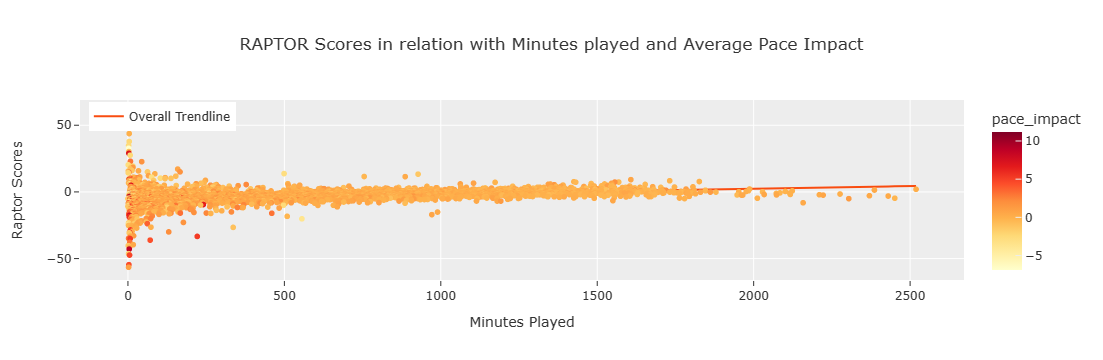

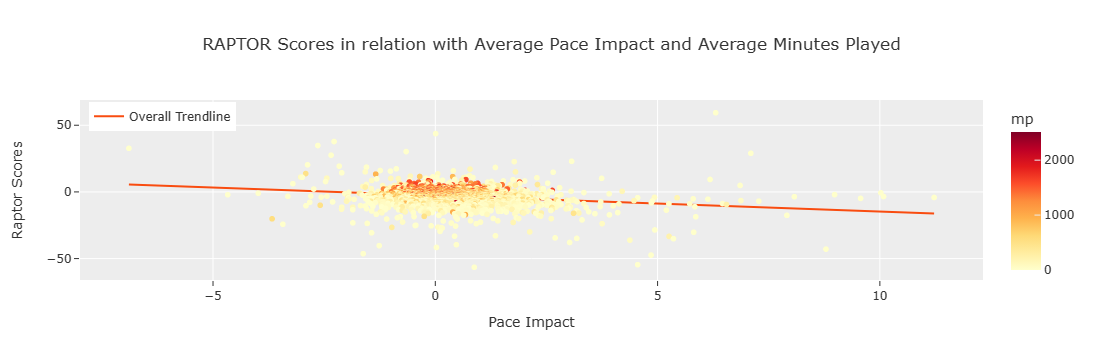

In [76]:
# Sort the data

by_raptor=mean_df.sort_values(by="raptor_total",ascending=False)
by_raptor

# declare variables

x0=by_raptor["mp"]
y0=by_raptor["raptor_total"]

x1=by_raptor["pace_impact"]
y1=by_raptor["raptor_total"]


# generate scatter plot

int_scatter(by_raptor,x0,y0,"pace_impact",
            "RAPTOR Scores in relation with Minutes played and Average Pace Impact",
           "Minutes Played","Raptor Scores")

int_scatter(by_raptor,x1,y1,"mp",
            "RAPTOR Scores in relation with Average Pace Impact and Average Minutes Played",
           "Pace Impact","Raptor Scores")

### Question #5: How do these statistics line up by player in relation to the top players/teams (MVPs) of the 2022-2023 season?

In [77]:
# fill all null values with 0 in latest_df
clean_df_2023 = latest_df.fillna(0)
clean_df_2023

player_name  player_id  season season_type team  poss    mp  \
0    Precious Achiuwa  achiupr01    2023          RS  TOR  2328  1140   
1        Steven Adams  adamsst01    2023          RS  MEM  2391  1133   
2         Bam Adebayo  adebaba01    2023          PO  MIA  1681   850   
3         Bam Adebayo  adebaba01    2023          RS  MIA  5252  2598   
4        Ochai Agbaji  agbajoc01    2023          RS  UTA  2604  1209   
..                ...        ...     ...         ...  ...   ...   ...   
821    Omer Yurtseven  yurtsom01    2023          RS  MIA   177    83   
822       Cody Zeller  zelleco01    2023          PO  MIA   354   174   
823       Cody Zeller  zelleco01    2023          RS  MIA   447   217   
824       Ivica Zubac  zubaciv01    2023          PO  LAC   274   130   
825       Ivica Zubac  zubaciv01    2023          RS  LAC  4447  2170   

     raptor_box_offense  raptor_box_defense  raptor_box_total  ...  \
0             -2.442459            0.605968         -1.836491  ...   
1             -0.539149            4.174473          3.635324  ...   
2             -2.042952            1.343185         -0.699767  ...   
3             -1.861596            2.663534          0.801939  ...   
4             -1.323938           -2.198396         -3.522334  ...   
..                  ...                 ...               ...  ...   
821            1.659495           -7.678176         -6.018681  ...   
822           -4.691477           -1.659638         -6.351115  ...   
823           -1.382510           -5.605615         -6.988125  ...   
824           -3.282714           11.150790          7.868076  ...   
825           -2.410808            1.892067         -0.518741  ...   

     raptor_offense  raptor_defense  raptor_total  war_total  war_reg_season  \
0         -1.771180       -0.283673     -2.054852   0.400488        0.400488   
1          0.416279        3.550985      3.967264   3.892111        3.892111   
2         -1.667750        1.933160      0.265409   1.342984        0.000000   
3         -1.154758        2.718460      1.563703   5.692164        5.692164   
4         -1.010696       -1.964927     -2.975622  -0.139469       -0.139469   
..              ...             ...           ...        ...             ...   
821        2.486415       -7.487443     -5.001027  -0.095551       -0.095551   
822       -3.408309       -1.285457     -4.693766  -0.178537        0.000000   
823       -1.370539       -5.780102     -7.150641  -0.488714       -0.488714   
824       -3.769316        8.511745      4.742429   0.515322        0.000000   
825       -1.957779        1.162465     -0.795315   2.150220        2.150220   

     war_playoffs  predator_offense  predator_defense  predator_total  \
0        0.000000         -1.867986         -0.182806       -2.050792   
1        0.000000          0.025097          3.570024        3.595120   
2        1.342984         -0.347436          2.167669        1.820232   
3        0.000000         -0.957159          2.658545        1.701386   
4        0.000000         -1.145865         -2.506387       -3.652252   
..            ...               ...               ...             ...   
821      0.000000          1.332271         -5.782120       -4.449850   
822     -0.178537         -3.123433         -2.253790       -5.377222   
823      0.000000         -1.658070         -3.760831       -5.418901   
824      0.515322         -4.849337          5.794117        0.944780   
825      0.000000         -2.378909          1.641620       -0.737289   

     pace_impact  
0      -0.956065  
1       0.237905  
2      -0.415820  
3      -0.452741  
4       0.216216  
..           ...  
821     0.241523  
822     0.312978  
823     0.311628  
824     0.534762  
825    -0.647313  

[826 rows x 23 columns]

**Top / MVP Players**

In [78]:
# Filter players based on the given conditions
player_filter = clean_df_2023[(clean_df_2023['poss'] > 2000) & (clean_df_2023['mp'] > 1350)]

# Group by player_name and aggregate the statistics
grouped_players = (player_filter.groupby('player_name')
                   .agg({
                       'raptor_total': 'sum',
                       'raptor_box_total': 'sum',
                       'raptor_offense': 'sum',
                       'raptor_defense': 'sum',
                       'war_total': 'sum'
                   }))

# Compute the player score
grouped_players['player_score'] = (grouped_players['raptor_total'] + 
                                   grouped_players['raptor_box_total'] + 
                                   grouped_players['raptor_offense'] + 
                                   grouped_players['raptor_defense'] + 
                                   grouped_players['war_total'])

In [79]:
# Sort players based on the player score and reset the index
sorted_players = (grouped_players.sort_values(by='player_score', ascending=False)
                          .reset_index())

# Adjusting the index to start from 1
sorted_players.index += 1

In [80]:
# Display top 20 players based on the player score
top_players = sorted_players[['player_name', 'player_score']].head(20)
top_players.head()

player_name  player_score
1    Nikola Jokic     62.052979
2     Joel Embiid     37.469713
3     Luka Doncic     37.156539
4  Damian Lillard     35.136630
5   Anthony Davis     31.542043

In [81]:
## Top players - Bar plot 
player_score = top_players["player_score"]
player_names = top_players["player_name"]

bar_plot(player_names, player_score, "Players", "Player Score", "Players in the 2022-23 Season", (22,7))

TypeError: bar_plot() missing 1 required positional argument: 'color'

In [ ]:
## Player Raptor Total 

# Sort players based on "raptor_total" and reset the index
player_raptor_total = (player_filter.sort_values(by='raptor_total', ascending=False)
                         .reset_index(drop=True))

# Adjusting the index to start from 1
player_raptor_total.index += 1

# Display top 10 players based on "raptor_total"
top_player_raptor_total = player_raptor_total[['player_name', 'raptor_total']].head(20)
top_player_raptor_total.head()


In [ ]:
## Player Raptor Box Total

# Sort players based on "raptor_box_total" and reset the index
raptor_box_total = (player_filter.sort_values(by='raptor_box_total', ascending=False)
                         .reset_index(drop=True))

# Adjusting the index to start from 1
raptor_box_total.index += 1

# Display top 10 players based on "raptor_box_total"
top_raptor_box_players = raptor_box_total[['player_name', 'raptor_box_total']].head(20)
top_raptor_box_players.head()

In [ ]:
## Player Raptor offense 

# Sort players based on "raptor_offense" and reset the index
raptor_offense = (player_filter.sort_values(by='raptor_offense', ascending=False)
                         .reset_index(drop=True))

# Adjusting the index to start from 1
raptor_offense.index += 1

# Display top 10 players based on "raptor_offense"
top_raptor_offense_players = raptor_offense[['player_name', 'raptor_offense']].head(20)
top_raptor_offense_players.head()

In [82]:
## Player Raptor defense 

# Sort players based on "raptor_defense" and reset the index
raptor_defense = (player_filter.sort_values(by='raptor_defense', ascending=False)
                         .reset_index(drop=True))

# Adjusting the index to start from 1
raptor_defense.index += 1

# Display top 10 players based on "raptor_defense"
top_raptor_defense_players = raptor_defense[['player_name', 'raptor_defense']].head(20)
top_raptor_defense_players.head()

player_name  raptor_defense
1    Alex Caruso        6.133136
2    Brook Lopez        5.020746
3  Anthony Davis        4.612329
4   Nikola Jokic        4.120241
5    Rudy Gobert        4.063762

In [83]:
## Player War total 

# Sort players based on "war_total" and reset the index
war_total = (player_filter.sort_values(by='war_total', ascending=False)
                         .reset_index(drop=True))

# Adjusting the index to start from 1
war_total.index += 1

# Display top 10 players based on "war_total"
top_war_total_players = war_total[['player_name', 'war_total']].head(20)
top_war_total_players.head()

player_name  war_total
1    Nikola Jokic  20.310952
2     Luka Doncic  12.984393
3     Joel Embiid  12.823468
4  Damian Lillard  11.521474
5    Jimmy Butler  10.112917

**Top Teams**

In [84]:
# Filter teams based on the given conditions
team_filter = clean_df_2023[(clean_df_2023['poss'] > 1500) & (clean_df_2023['mp'] > 1250)]

# Group by team and aggregate the statistics
grouped_teams = (team_filter.groupby('team')
                   .agg({
                       'raptor_total': 'sum',
                       'raptor_box_total': 'sum',
                       'raptor_offense': 'sum',
                       'raptor_defense': 'sum',
                       'war_total': 'sum'
                   }))

# Compute the team score
grouped_teams['team_score'] = (grouped_teams['raptor_total'] + 
                                   grouped_teams['raptor_box_total'] + 
                                   grouped_teams['raptor_offense'] + 
                                   grouped_teams['raptor_defense'] + 
                                   grouped_teams['war_total'])

# Sort teams based on the teams score and reset the index
sorted_teams = (grouped_teams.sort_values(by='team_score', ascending=False)
                          .reset_index())

# Adjusting the index to start from 1
sorted_teams.index += 1

# Display the top 10 teams based on the player score
top_teams = sorted_teams[['team', 'team_score']].head(20)
top_teams.head()

team  team_score
1  DEN   96.026179
2  BOS   82.618414
3  MIL   78.389680
4  CLE   76.217487
5  MEM   61.719364

In [85]:
## Top team - Bar plot 

team_score = top_teams["team_score"]
teams = top_teams["team"]

bar_plot(teams, team_score, "Team", "Team Score", "Teams in the 2022-23 Season", (22,7))

TypeError: bar_plot() missing 1 required positional argument: 'color'

In [86]:
## Top Teams - Raptor total

# Sort team based on "raptor_total" and reset the index
team_raptor_total = (player_filter.sort_values(by='raptor_total', ascending=False)
                         .reset_index(drop=True))

# Adjusting the index to start from 1
team_raptor_total.index += 1

# Display the top 10 teams based on "raptor_total"
top_team_raptor_total = team_raptor_total[['team', 'raptor_total']].head(20)
top_team_raptor_total.head()

team  raptor_total
1  DEN     14.092699
2  PHI      8.209079
3  DAL      7.823608
4  POR      7.816497
5  LAL      7.284084

In [87]:
## Team Raptor box total

# Sort teams based on "raptor_box_total" and reset the index
team_raptor_box_total = (player_filter.sort_values(by='raptor_box_total', ascending=False)
                         .reset_index(drop=True))

# Adjusting the index to start from 1
team_raptor_box_total.index += 1

# Display top 10 teams based on "raptor_box_total"
top_team_raptor_box_total = team_raptor_box_total[['team', 'raptor_box_total']].head(20)
top_team_raptor_box_total.head()

team  raptor_box_total
1  DEN         13.556629
2  DAL          8.524930
3  PHI          8.228086
4  POR          7.982161
5  MIA          7.557962

In [88]:
## Team Raptor offense

# Sort teams based on "raptor_offense" and reset the index
team_raptor_offense = (player_filter.sort_values(by='raptor_offense', ascending=False)
                         .reset_index(drop=True))

# Adjusting the index to start from 1
team_raptor_offense.index += 1

# Display top 10 teams based on "raptor_offense"
top_team_raptor_offense = team_raptor_offense[['team', 'raptor_offense']].head(20)
top_team_raptor_offense.head()

team  raptor_offense
1  DEN        9.972458
2  POR        9.282637
3  DAL        8.272470
4  GSW        7.492136
5  IND        6.902477

In [89]:
## Top Teams - Raptor Defense 

# Sort teams based on "raptor_defense" and reset the index
team_raptor_defense = (player_filter.sort_values(by='raptor_defense', ascending=False)
                         .reset_index(drop=True))

# Adjusting the index to start from 1
team_raptor_defense.index += 1

# Display top 10 teams based on "raptor_defense"
top_team_raptor_defense = team_raptor_defense[['team', 'raptor_defense']].head(20)
top_team_raptor_defense.head()

team  raptor_defense
1  CHI        6.133136
2  MIL        5.020746
3  LAL        4.612329
4  DEN        4.120241
5  MIN        4.063762

In [90]:
## Top Teams - War Total 
# Sort teams based on "war_total" and reset the index
team_war_total = (player_filter.sort_values(by='war_total', ascending=False)
                         .reset_index(drop=True))

# Adjusting the index to start from 1
team_war_total.index += 1

# Display top 10 teams based on "war_total"
top_team_war_total = team_war_total[['team', 'war_total']].head(20)
top_team_war_total.head()

team  war_total
1  DEN  20.310952
2  DAL  12.984393
3  PHI  12.823468
4  POR  11.521474
5  MIA  10.112917

**Linear Regression Plot**

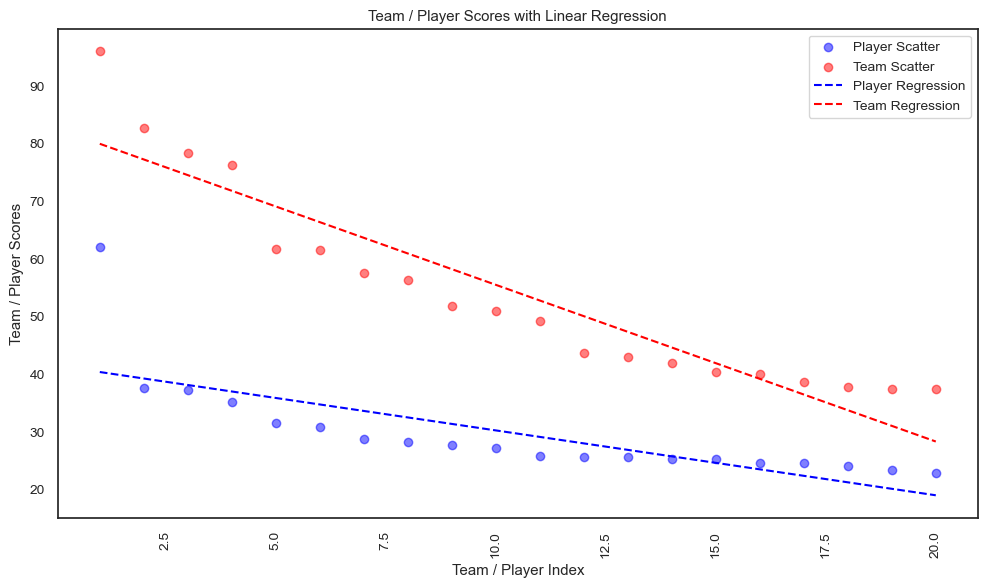

In [91]:
# Scatter plot with top players & top teams data
plt.figure(figsize=(10, 6))

# Scatter plot for players top scores
plt.scatter(top_players.index, top_players["player_score"], alpha = 0.5, color="blue", label="Player Scatter")

# Scatter plot for teams top scores
plt.scatter(top_teams.index, top_teams["team_score"], alpha = 0.5, color="red", label="Team Scatter")

# Linear regression for top players
hist_x = top_players.index.values
hist_y = top_players["player_score"].values
hist_slope, hist_intercept = np.polyfit(hist_x, hist_y, 1)
plt.plot(hist_x, hist_slope * hist_x + hist_intercept, color="blue", linestyle="--", label="Player Regression")

# Linear regression for top team
lat_x = top_teams.index.values
lat_y = top_teams["team_score"].values
lat_slope, lat_intercept = np.polyfit(lat_x, lat_y, 1)
plt.plot(lat_x, lat_slope * lat_x + lat_intercept, color="red", linestyle="--", label="Team Regression")

plt.xlabel("Team / Player Index")
plt.ylabel("Team / Player Scores")
plt.title("Team / Player Scores with Linear Regression")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

plt.show()

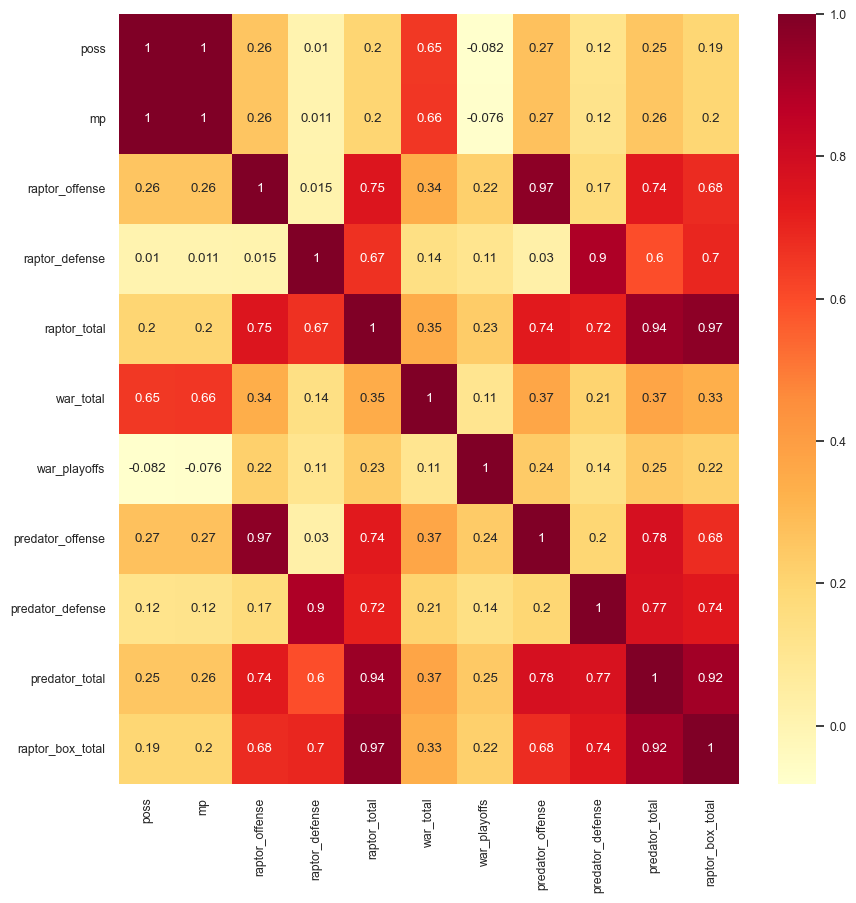

In [92]:
## Correlation

corr_df=clean_df_2023[['poss',
       'mp', 'raptor_offense', 'raptor_defense', 'raptor_total', 'war_total', 
       'war_playoffs', 'predator_offense', 'predator_defense', 'predator_total',
       'raptor_box_total']].corr()


plt.figure(figsize=(10,10))
sns.set_context("notebook",font_scale=0.8)

sns.heatmap(corr_df, annot=True, cmap="YlOrRd")
plt.show()

## **Analysis/Results**

### Correaltion Matrix

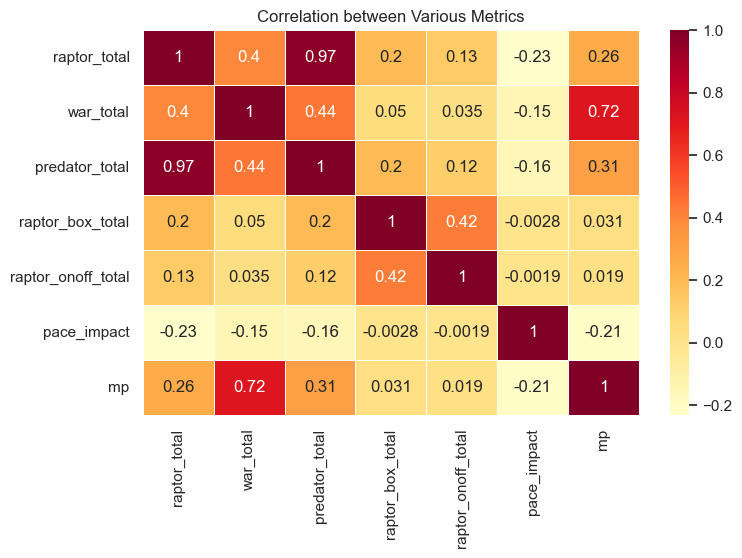

In [93]:
# ref - youtube - Derek Banas
# Filter the clean dataframe for desired features

df_mx=clean_df[[ 'raptor_total', 
                'war_total',
                'predator_total',
                'raptor_box_total',
                'raptor_onoff_total',
                "pace_impact","mp"]].corr()

# plot a heatmap 

plt.figure(figsize=(8,5))
sns.set_context("notebook",font_scale=1)

sns.heatmap(df_mx, annot=True, cmap="YlOrRd",linewidth=0.5)
plt.title("Correlation between Various Metrics") # can be improved
plt.savefig("Correlation.png")
plt.show()

### Team vs Season vs Raptor Scores

In [94]:
# # Filter the data
# cluster_plot=clean_df[["season","team","raptor_total"]]

# # Plot a pivot table and assign varibale name

# cluster_plot=cluster_plot.pivot_table(index="team",columns="season",values="raptor_total")
# cluster_plot=cluster_plot.dropna()

# # # Plot a heatmap
# # plt.figure(figsize=(10,5))
# # sns.set_context("notebook",font_scale=1)
# # sns.heatmap(cluster_plot, cmap="YlOrRd")
# # plt.show()

# fig=px.imshow(cluster_plot,aspect="auto",color_continuous_scale='YlOrRd',title="RAPTOR Scores by Team per Season")
# fig.update_xaxes(side="top")
# fig.layout.height = 500
# fig.layout.width = 1000
# fig.show()

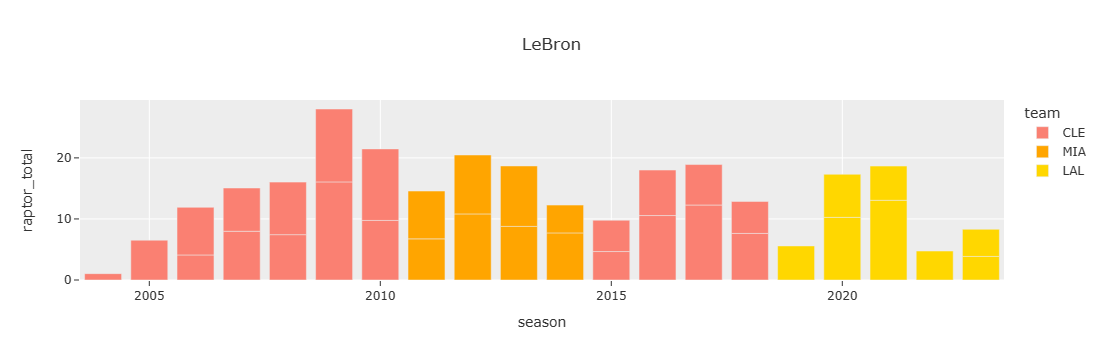

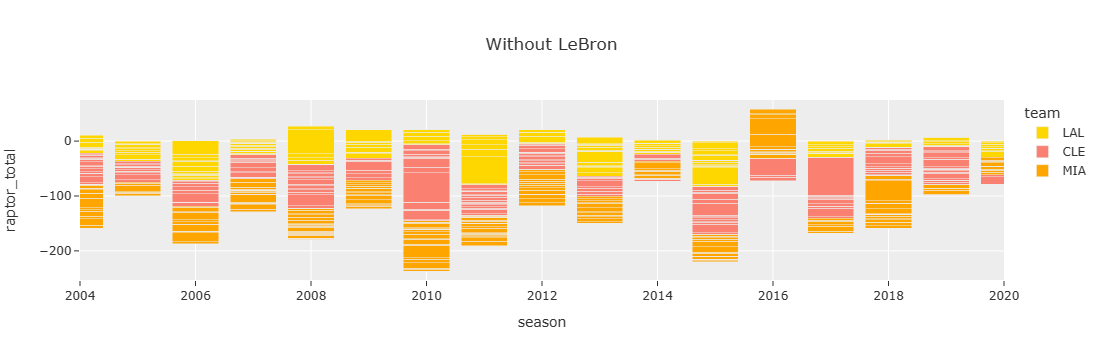

In [95]:
# color_discrete_map from [here](https://stackoverflow.com/questions/60681437/plotly-express-bar-chart-colour-change)

# Slice dataframe
LJ=clean_df[clean_df["player_name"]=="LeBron James"]

df2=clean_df[clean_df['player_name'] != "LeBron James"]
df2=df2[(df2['team'] == "CLE")|(df2['team'] == 'MIA')|(df2['team'] == 'LAL')]

# Generate bar plot

fig1=px.bar(LJ, x="season",
            y="raptor_total",
            color="team",
            title="LeBron",
            template="ggplot2",
            color_discrete_map={'CLE': 'salmon','MIA': 'orange','LAL':'gold'})
fig2=px.bar(df2, x="season",
            y="raptor_total",
            color="team",
            title="Without LeBron",
            template="ggplot2",
            range_x=[2004,2020],
            barmode='stack',
            color_discrete_map={'CLE': 'salmon','MIA': 'orange','LAL':'gold'}
            
           
           )

fig1.show()
fig2.show()

### BOXPLOTS

In [96]:
# box=clean_df[["player_name","raptor_total","predator_total","pace_impact","season"]].groupby(["player_name","season"])[["raptor_total","predator_total","pace_impact"]]\
#             .sum().sort_values(by="pace_impact",ascending=False)

# box=box.reset_index()
# box.head(2)

In [101]:
# IDK HELP

# I tried messing with this and it's already being told in Wipawadee's question, so I dont think it's necessary here. - Jonathan

# y0=box["raptor_total"]
# y1=box["predator_total"]

# N=50
# fig = go.Figure()
# fig.add_trace(go.Box(y=y0, name="raptor total", marker_color = 'indianred',boxpoints="all"))
# fig.add_trace(go.Box(y=y1,name="predator total", marker_color = 'lightseagreen',boxpoints="all"))


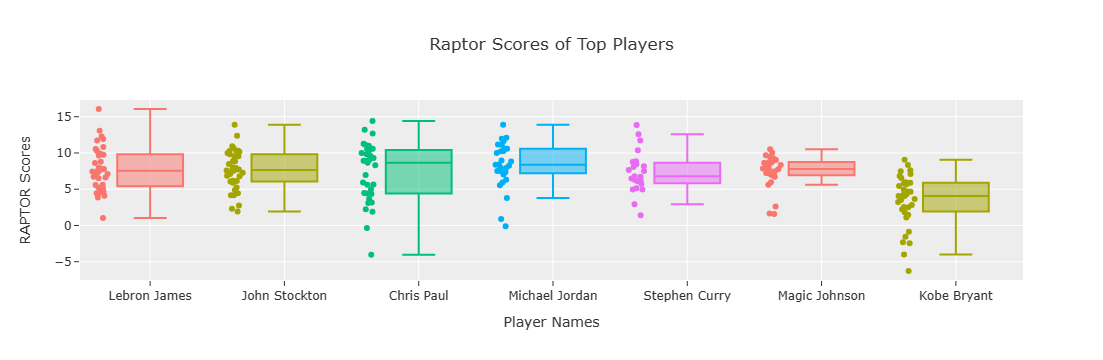

In [98]:
# ref - youtube 'Data Science Tutorials'

# filtered players

box1=box_var("LeBron James")
box2=box_var("John Stockton")
box3=box_var("Chris Paul")
box4=box_var("Michael Jordan")
box5=box_var("Stephen Curry")
box6=box_var("Magic Johnson")
box7=box_var("Kobe Bryant")

# variables for boxplot

trace1=trace_var(box1,"Lebron James")
trace2=trace_var(box2,"John Stockton")
trace3=trace_var(box3,"Chris Paul")
trace4=trace_var(box4,"Michael Jordan")
trace5=trace_var(box5,"Stephen Curry")
trace6=trace_var(box6,"Magic Johnson")
trace7=trace_var(box7,"Kobe Bryant")


# put them together

data=[trace1,trace2,trace3,trace4,trace5,trace6,trace7]
layout = go.Layout(title="Raptor Scores of Top Players",
                   template="ggplot2",
                   showlegend=False)

fig = go.Figure(data=data, layout=layout)
fig.update_layout(yaxis_title='RAPTOR Scores',
                 xaxis_title="Player Names")
fig.show()


**Line Plot Comapring LeBron and Kobe**

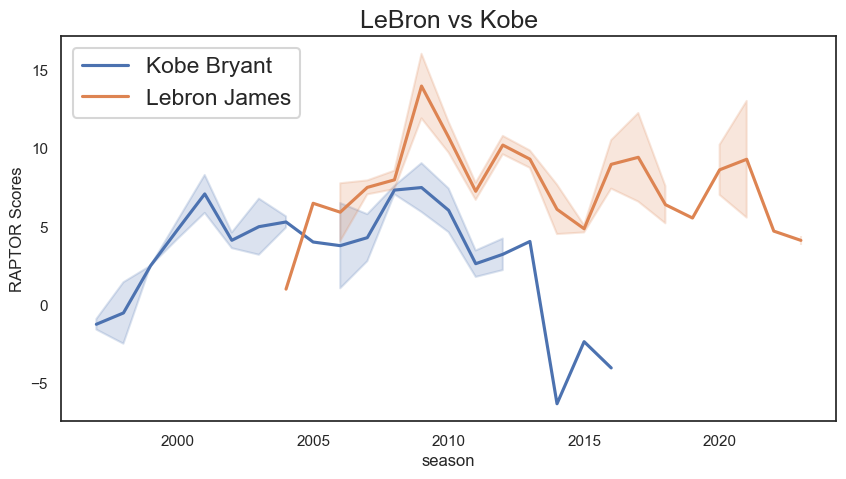

In [99]:
lebron=clean_df[(clean_df["player_name"] == "LeBron James")]
kobe=clean_df[(clean_df["player_name"] == "Kobe Bryant")]

plt.subplots(figsize=(10, 5))
sns.set_theme(style="whitegrid",context="talk")
sns.lineplot(data=kobe,x="season", y="raptor_total", label="Kobe Bryant",legend=True)
sns.lineplot(data=lebron,x="season", y="raptor_total", label="Lebron James", legend=True)
plt.title("LeBron vs Kobe")
plt.ylabel("RAPTOR Scores")
plt.legend(loc="upper left")
plt.savefig("LeBronvsKObe.png")
plt.show()